In [1]:
## Importando bibliotecas

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split



# Introdução


Este projeto tem como objetivo realizar uma regressão linear em um conjunto de dados. O conjunt que será utilizado será o epldata_final.csv, que é referente a informações sobre jogadores e seus valores de mercado. Os jogadores do conjunto pertencem a premier-league na temporada 17-18.

O interessante desta análise e que poderemos compreender como estavam dispostos os valores naquela época e entender como isto mudou atualmente.

Todos os dados e informações reais, que serão adicionadas à este projeto serão retirados do transfermaket, um site que possui diversas informações sobre futebol

# Importando o conjunto de dados

In [2]:
df = pd.read_csv("epldata_final.csv")

In [3]:
df.head()

name     club  age position  position_cat  market_value  \
0     Alexis Sanchez  Arsenal   28       LW             1          65.0   
1         Mesut Ozil  Arsenal   28       AM             1          50.0   
2          Petr Cech  Arsenal   35       GK             4           7.0   
3       Theo Walcott  Arsenal   28       RW             1          20.0   
4  Laurent Koscielny  Arsenal   31       CB             3          22.0   

   page_views  fpl_value fpl_sel  fpl_points  region     nationality  \
0        4329       12.0  17.10%         264     3.0           Chile   
1        4395        9.5   5.60%         167     2.0         Germany   
2        1529        5.5   5.90%         134     2.0  Czech Republic   
3        2393        7.5   1.50%         122     1.0         England   
4         912        6.0   0.70%         121     2.0          France   

   new_foreign  age_cat  club_id  big_club  new_signing  
0            0        4        1         1            0  
1            0        4        1         1            0  
2            0        6        1         1            0  
3            0        4        1         1            0  
4            0        4        1         1            0

In [4]:
df.shape

(461, 17)

# Análise dos atributos

In [5]:
df.columns

Index(['name', 'club', 'age', 'position', 'position_cat', 'market_value',
       'page_views', 'fpl_value', 'fpl_sel', 'fpl_points', 'region',
       'nationality', 'new_foreign', 'age_cat', 'club_id', 'big_club',
       'new_signing'],
      dtype='object')

In [6]:
sns.set(rc={'figure.figsize':(11.7,8.27)})


## Name

Representa o nome dos jogadores presente neste conjunto de dados. Um atributo muito interessante que embora não será utilizado para a Regressão Linear pode ser utilizado para verificar informações sobre o jogador no mundo real

## Club

Representa o clube a qual o jogador pertence, algo bem interessante que deve ser levado em conta, visto que atualmente o time que o jogador pertence é algo muito importante para determinar o preço dele.

Abaixo podemos verificar quais times estão presentes neste conjunto de dados da Premier League

In [7]:
df['club'].unique()

array(['Arsenal', 'Bournemouth', 'Brighton+and+Hove', 'Burnley',
       'Chelsea', 'Crystal+Palace', 'Everton', 'Huddersfield',
       'Leicester+City', 'Liverpool', 'Manchester+City',
       'Manchester+United', 'Newcastle+United', 'Southampton',
       'Stoke+City', 'Swansea', 'Tottenham', 'Watford', 'West+Brom',
       'West+Ham'], dtype=object)

In [8]:
len(df['club'].unique())

20

Dessa maneira, podemos perceber que neste conjunto de dados temos todos os times da primeira divisão na época que este dataset foi construído (2017)

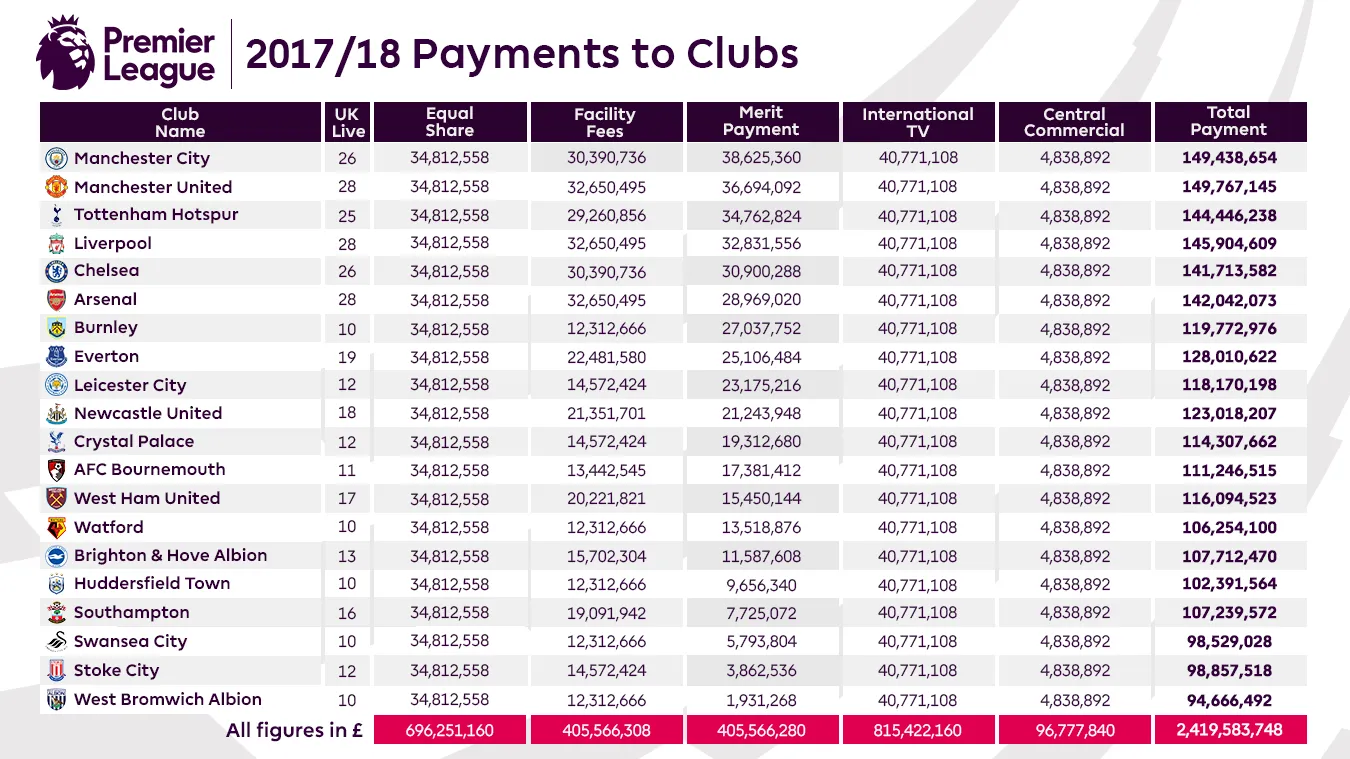

## Age

Idade do jogador. Um atributo muito importante, visto que na teoria, jogadores mais novos tendem a ter um valor de mercado mais alto, devido ao seu potencial de evolução, enquanto jogadores mais velhos tendem a ter um valor menor, visto que tem muito mais risco de ter lesões e não performar tão bem devido a idade. Mas isto é apenas a teoria, existem casos e casos

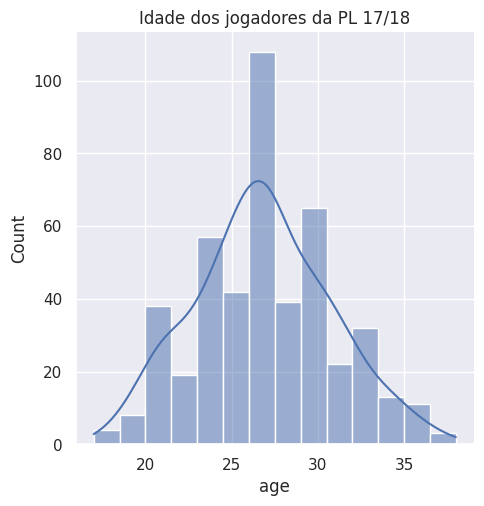

In [9]:
sns.displot(data=df, x="age", kde=True)
plt.title("Idade dos jogadores da PL 17/18")
plt.show()

Com o gráfico acima podemos compreender que a maioria dos jogadores tem a idade ente 25-30, o que é bem comum na maioria das ligas ao redor do mundo, como pode ser compreender abaixo.

**Liga da Alemanha (Bundesliga):** 26.1

**Liga da Espanha (La Liga):** 27.8

**Liga da França (League One):** 26

**Liga da Itália (Serie A):** 26.7

Logo, podemos verificar a média da PL 17/18

In [10]:
df['age'].mean()


26.80477223427332

Desta maneira, pode-se compreender que a PL está no conforme de média de idade entre as 5 grandes ligas da europa

## Position

Este atributo também é muito importante pois define a posição do jogador. É interessante notar, que jogadores da parte ofensiva da equipe tendem a ter valores de mercado maiores, mas existem alguns defensores e meios campos defensivos que tem altos valores pela sua qualidade. Podemos verificar como estão dispostas essas posições

In [11]:
df['position'].unique()

array(['LW', 'AM', 'GK', 'RW', 'CB', 'RB', 'CF', 'LB', 'DM', 'RM', 'CM',
       'SS', 'LM'], dtype=object)

Para traduzir:

GK - Goleiro

CB - Zagueiro

LB - Lateral Esquerdo

RB - Lateral Direito

DM - Volante

CM - Meio-Campo
 
LM - Meia Esquerda

RM - Meia Direita

AM - Meia-Atacante

LW - Ponta Esquerda

RW - Ponta Direita

CF - Atacante

SS - Segundo Atacante


Podemos ver, como estão distribuidos os jogadores por posição

In [12]:
df['position'].value_counts().values

array([85, 63, 61, 42, 36, 36, 35, 34, 32, 17,  8,  7,  5])

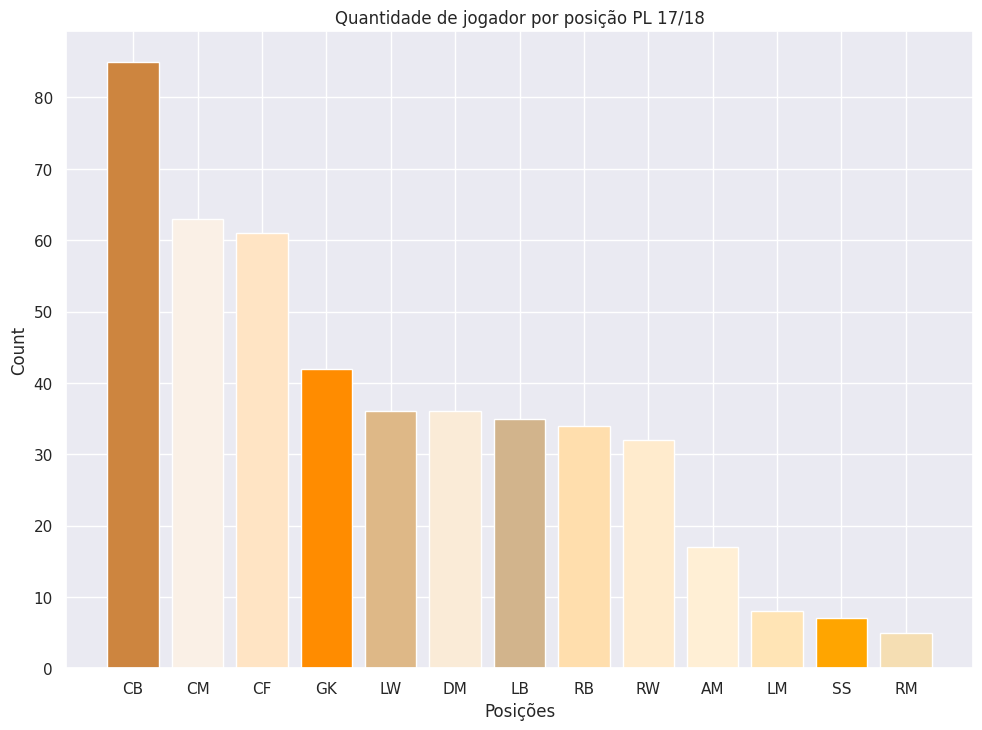

In [13]:
# Create bars with different colors
plt.bar(df['position'].value_counts().keys(), df['position'].value_counts().values
        , color=['peru','linen','bisque','darkorange','burlywood','antiquewhite','tan','navajowhite','blanchedalmond','papayawhip',
'moccasin','orange','wheat'])

# Create names on the x-axis
plt.xlabel("Posições")
plt.ylabel("Count")
plt.title("Quantidade de jogador por posição PL 17/18")

# Show graph
plt.show()

## Position_ID

Este atributo é relacionado ao ID da posição do jogador, entretanto não é um ID para cada posição, mas sim um ID para cada "função".

1 é para atacantes

2 para meios de campo

3 para defensores

4 para goleiros


Este atributo pode ser interessante caso não haja desejo se trabalhar com posições específicas mas sim com posições mais abrangentes

## Market Value

Este atributo é um dos mais importantes pois é o que está tentando ser predito neste trabalho. Logo é interessante verificar como ele está disposto no conjnto de dados

Text(0.5, 1.0, 'Distribuição do valor de mercado dos jogadores da PL 17/18')

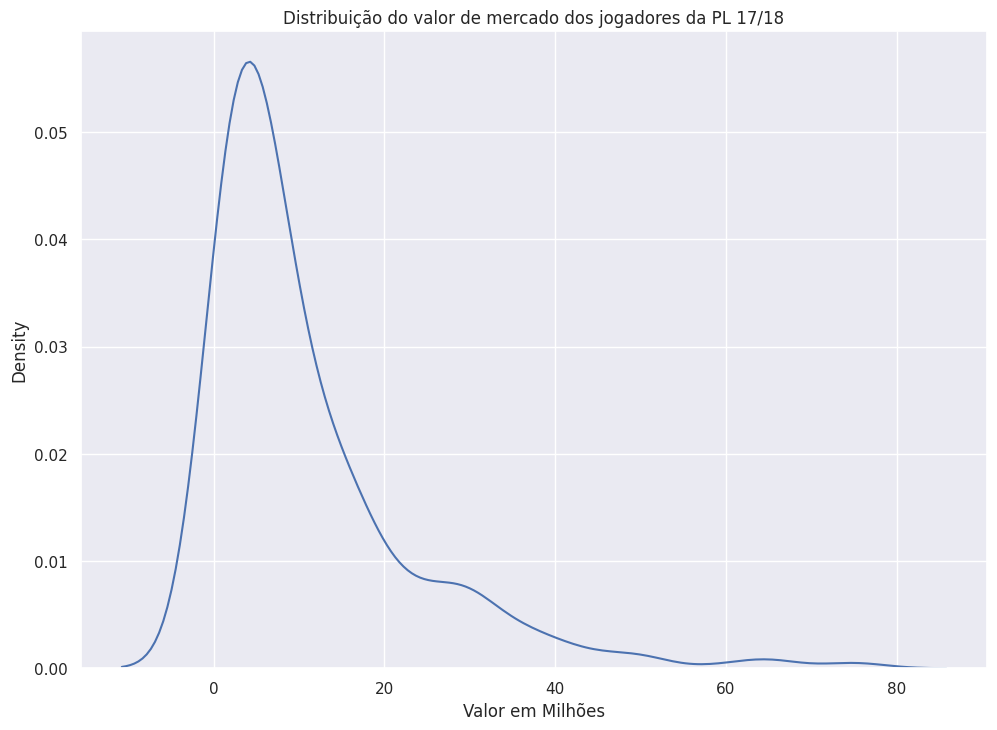

In [14]:
sns.kdeplot(df['market_value'])

plt.xlabel("Valor em Milhões")

plt.title("Distribuição do valor de mercado dos jogadores da PL 17/18")

É possível verificar que a maioria dos jogadores tem valor abaixo de 20 milhões. O que é esperado visto que jogadores com preço mais elevado são raros. Abaixo podemos ver o máximo e mínimo. 

In [15]:
df['market_value'].max()

75.0

In [16]:
df['market_value'].min()

0.05

## Page Views

Este atributo é um pouco subjetivo, pois é referente a média de visitas diárias a página do jogador na Wikipedia durante um período de 1 mês

Text(0.5, 1.0, 'Distribuição da média de visita diária nas página dos jogadores da PL 17/18')

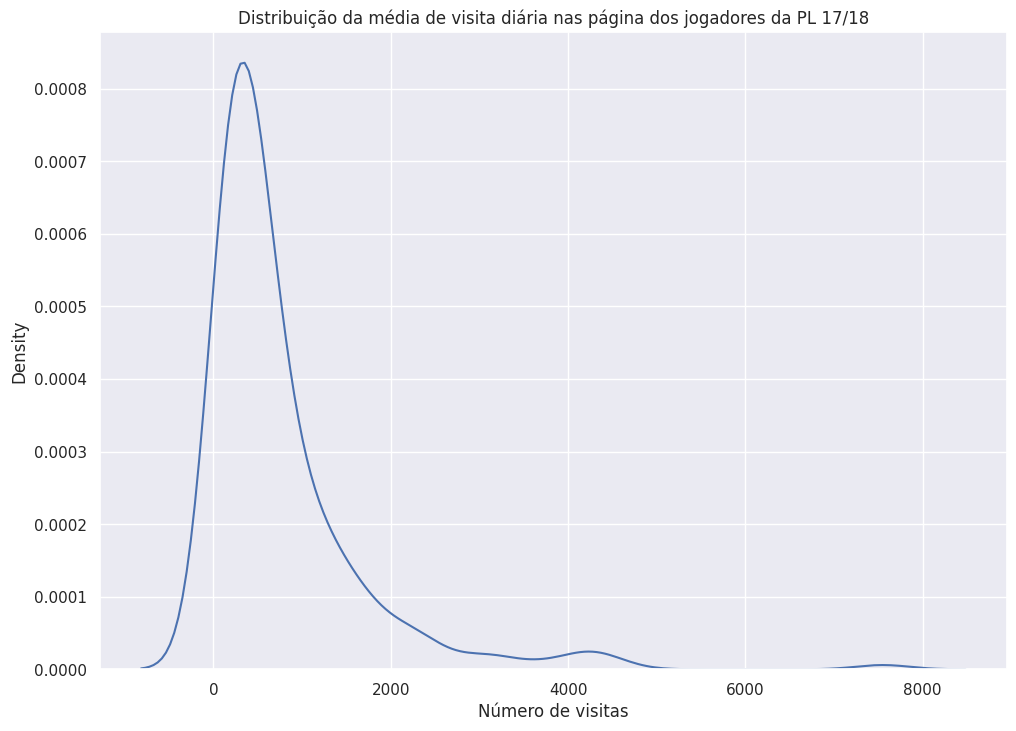

In [17]:
sns.kdeplot(df['page_views'])

plt.xlabel("Número de visitas")

plt.title("Distribuição da média de visita diária nas página dos jogadores da PL 17/18")

Um atributo bem interessante, pois consegue mostrar os jogadores mais "hypados" pelo mundo do futebol

## FPL value & FPL SEL & FPL_POINTS

Estes 3 atributos são referentes ao Fantasy Team. São bastante relevantes pois todos eles são relacionados a performance individual do jogador, visto que caso ele obtenha uma boa performance tem muita chance de conseguir uma boa pontuação. Entretanto elas não serão individualmente analisadas.

## Region

Este atributo é relevante pois mostra qual região o jogador pertence, entretanto não é algo tão específico, possui 4 valores possíveis:

1 para jogadores da Inglaterra

2 para jogadores da União Europeia 

3 para jogadores das Américas (Sul, Norte e Central)

4 para o resto do mundo


Abaixo podemos verificar com estão dispostos os jogadores em relação a nacionalidade. O intuitivo é que como se trata de campeonato inglês tenham mais jogadores da Inglaterra, entretanto com é uma liga muito famosa e atrativa existem jogadores de diversas nacionalidades

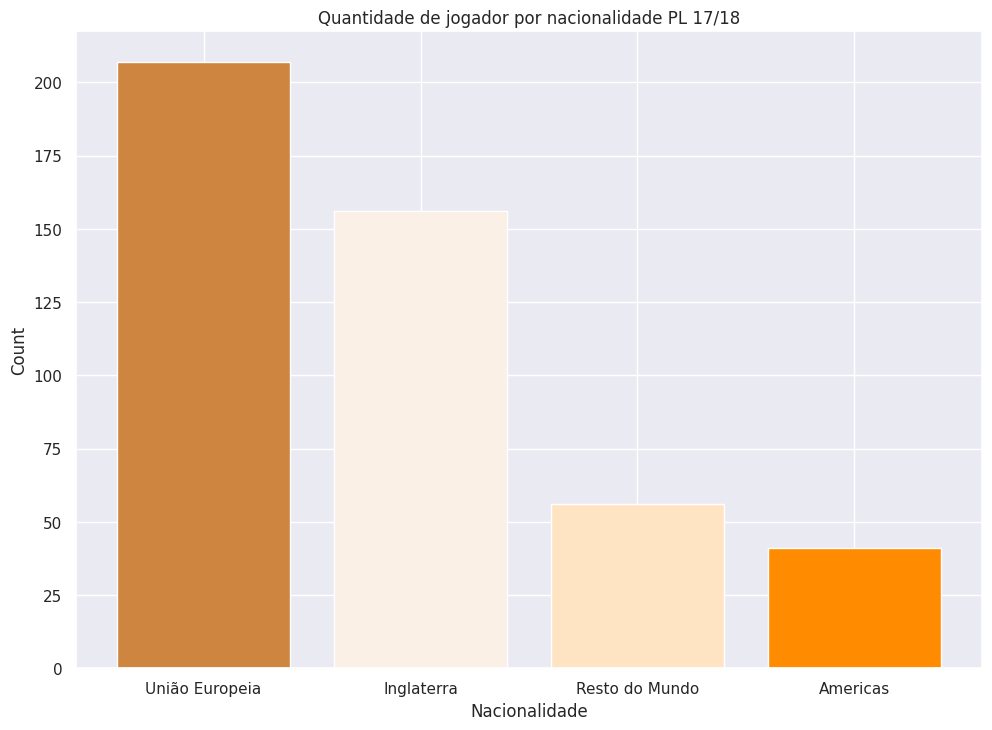

In [18]:
# Create bars with different colors
plt.bar(['União Europeia','Inglaterra','Resto do Mundo','Americas'], df['region'].value_counts().values
        , color=['peru','linen','bisque','darkorange','burlywood','antiquewhite','tan','navajowhite','blanchedalmond','papayawhip',
'moccasin','orange','wheat'])

# Create names on the x-axis
plt.xlabel("Nacionalidade")
plt.ylabel("Count")
plt.title("Quantidade de jogador por nacionalidade PL 17/18")

# Show graph
plt.show()

É interessante notar que diferente do pensado a maioria dos jogadores pertence a União Europeia e não a Inglaterra.

## Nationality

Agora sim, este atributo diz respeito a nacionalidade do jogador em específico

In [19]:
len(df['nationality'].unique())

61

Podemos compreender que temos 61 nacionalidade diferentes, entretanto vamos verificar apenas as 10 maiores

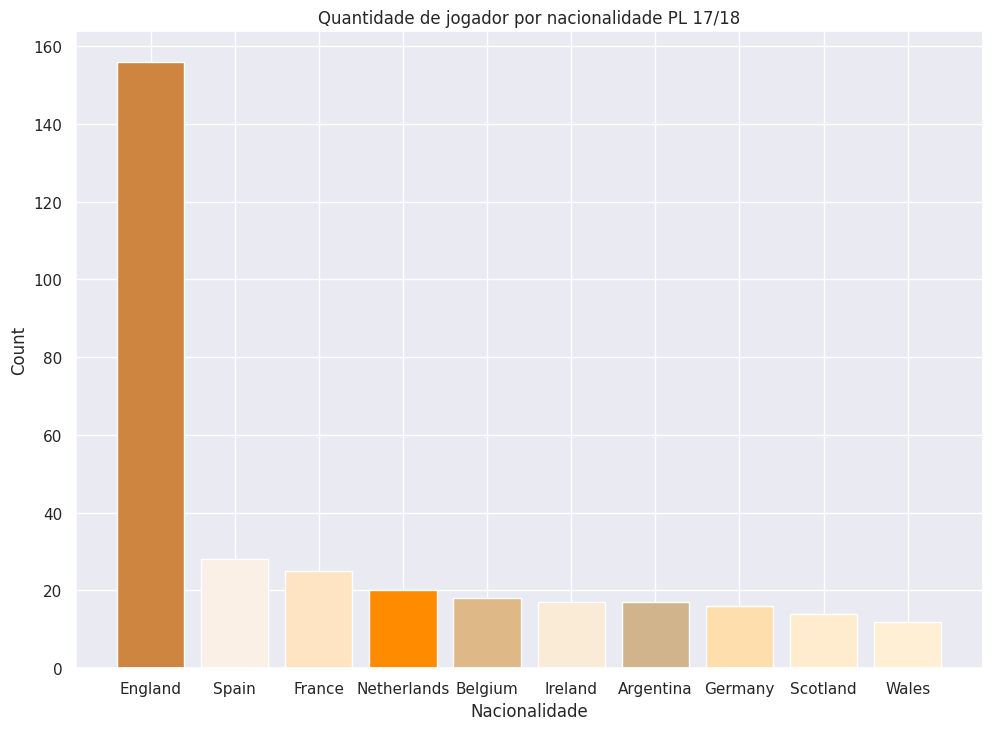

In [20]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

# Create bars with different colors
plt.bar(df['nationality'].value_counts().keys()[:10], df['nationality'].value_counts().values[:10]
        , color=['peru','linen','bisque','darkorange','burlywood','antiquewhite','tan','navajowhite','blanchedalmond','papayawhip',
'moccasin','orange','wheat'])

# Create names on the x-axis
plt.xlabel("Nacionalidade")
plt.ylabel("Count")
plt.title("Quantidade de jogador por nacionalidade PL 17/18")

# Show graph
plt.show()

É interessante notar que todos os países do Reino Unido estão presentes nesta lista oque é entendível, visto que embora o campeonato seja sediado na Inglaterra é mais fácil um jogador do Reino Unido jogar, visto que ele não irá contar como estrangeiro no time, além obviamente de exisitir um time do País de Gales (Wales) o Swansea City.

Além disso é interessante notar que a argentina está nesta lista

Já o Brasil tem o seguinte número de Jogadores Nesta Premier League

In [21]:
df['nationality'].value_counts()['Brazil']

12

## New Foreign

Este atributo é referente a caso um jogador seja uma nova contratação de uma liga estrangeira. Bem interessante, pois podemos ver como foi a janela de Transferências desta temporada em relação ao mercado estrangeiro

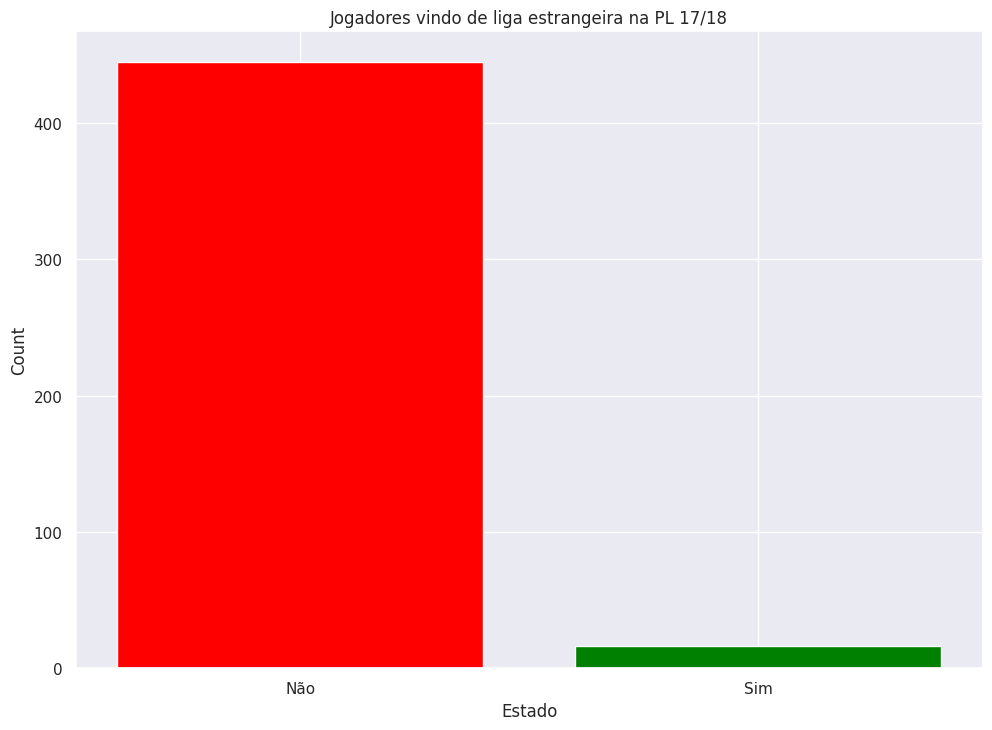

In [22]:

# Create bars with different colors
plt.bar(['Não','Sim'], df['new_foreign'].value_counts().values
        , color=['red','green'])

# Create names on the x-axis
plt.xlabel("Estado")
plt.ylabel("Count")
plt.title("Jogadores vindo de liga estrangeira na PL 17/18")

# Show graph
plt.show()

In [23]:
df['new_foreign'].value_counts().values

array([445,  16])

Pode-se verificar que a Janela foi ate que movimentada, visto que 16 jogadores vieram da liga estrangeira, o que é algo bem movimentado

## Age Cat

In [24]:
df['age_cat'].unique()

array([4, 6, 2, 3, 1, 5])

Este atributo diz respeito a faixa etária do jogador

1 jogadores até 21 anos

2 jogadores até 24 anos

3 jogadores até 27 anos

4 jogadores até 31 anos

5 jogadores até 33 anos

6 jogadores com mais de 33 anos

Bem interessante pois meio que ordena as faixas etárias

## Club ID

Simplesmente o ID do club do jogador, nada muito informativo

In [25]:
len(df['club_id'].unique())

20

## Big Club

In [26]:
len(df[df['big_club'] == 1]['club'].unique())

6

Na Inglaterra existe uma ideia de que existe um Big-6, que são os 6 times mais podersos da liga, com mais dinheiro, mais jogadores, mais torcida. Esse clubes geralmente são os ganhadores da liga e realizam as contratações mais caras.

Dessa maneira eles tem mais exposição para o mercado do futebol, logo se um jogador pertence a um destes clubes a probabilidade do seu valor de mercado ser alto é bem grande.

Como podemos ver abaixo, de 2005 até 2022, apenas 1 time fora do Big Six foi campeão da Liga, evidenciando essa disparidade

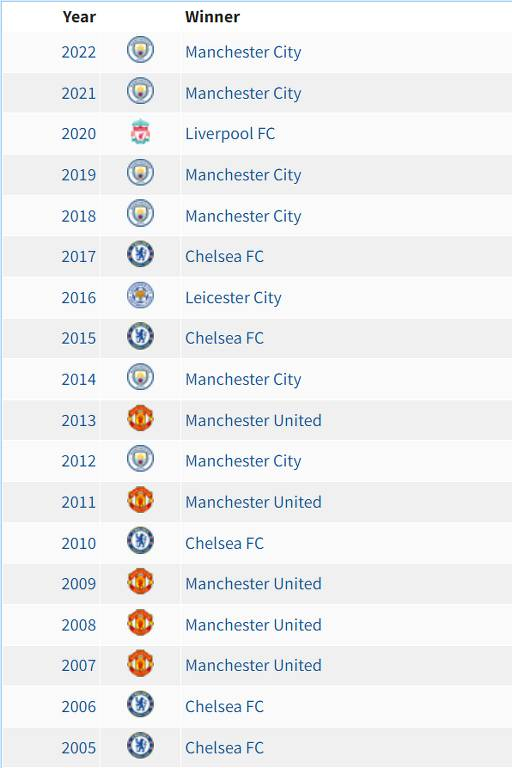

Para enfatizar o Big Six é composto pelos seguintes clubes

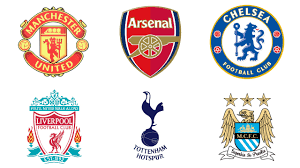

## New signing

Atributo referente ao jogador ser ou não uma nova contratação, bem parecido com o atributo "new_foreign" mas não se importa com o fato do jogador ser de uma liga estrangeira, mas isto deve ser levado em conta, visto que existe muitas ligas que não são tão valorizadas.

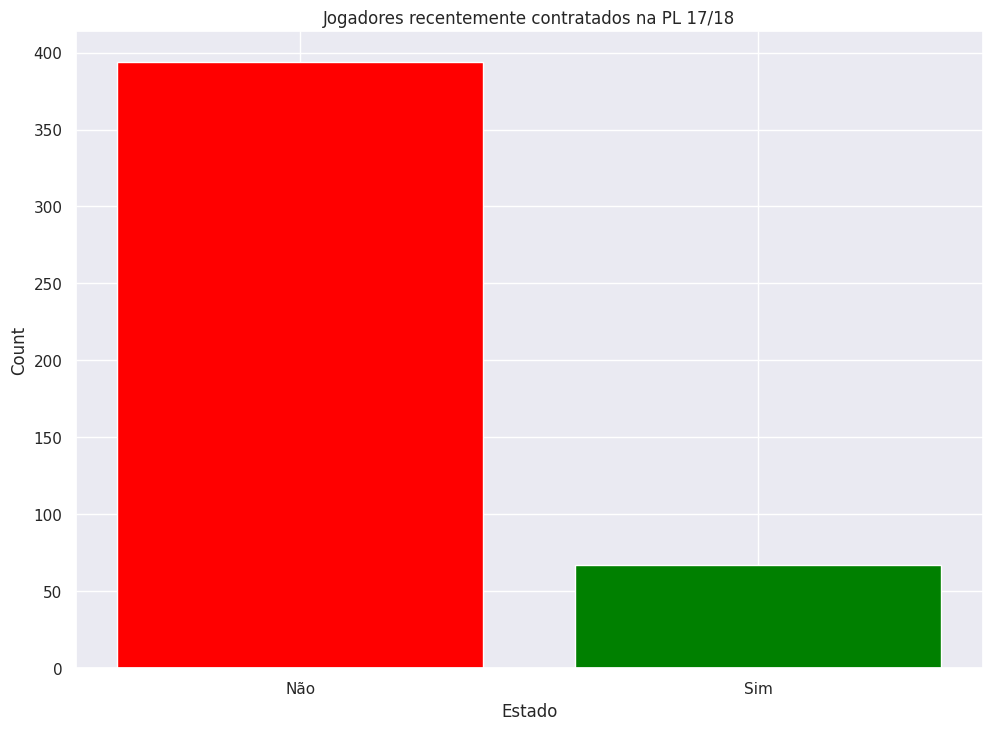

In [27]:

# Create bars with different colors
plt.bar(['Não','Sim'], df['new_signing'].value_counts().values
        , color=['red','green'])

# Create names on the x-axis
plt.xlabel("Estado")
plt.ylabel("Count")
plt.title("Jogadores recentemente contratados na PL 17/18")

# Show graph
plt.show()

Percebe-se que foi uma Janela bem movimentada, com mais de 50 novas contratações

Apenas para evidenciar, um jogador que veio de uma liga estrangeia também não terá este atributo com o valor de 1, logo estes jogadores são apenas de clubes ingleses

In [28]:
df[df['new_foreign'] == 1]

name               club  age position  position_cat  \
26        Sead Kolasinac            Arsenal   24       LB             3   
27   Alexandre Lacazette            Arsenal   26       CF             1   
110      Antonio Rudiger            Chelsea   24       CB             3   
111     Tiemoue Bakayoko            Chelsea   22       DM             2   
159        Davy Klaassen            Everton   24       AM             1   
160       Sandro Ramirez            Everton   22       CF             1   
212       Vicente Iborra     Leicester+City   29       DM             2   
237        Mohamed Salah          Liverpool   25       RW             1   
258       Ederson Moraes    Manchester+City   23       GK             4   
259       Bernardo Silva    Manchester+City   22       RW             1   
284      Victor Lindelof  Manchester+United   23       CB             3   
328         Jan Bednarek        Southampton   21       CB             3   
374           Roque Mesa            Swansea   28       CM             2   
417         Kiko Femenia            Watford   26       RB             3   
419          Will Hughes            Watford   22       CM             2   
438         Ahmed Hegazy          West+Brom   26       CB             3   

     market_value  page_views  fpl_value fpl_sel  fpl_points  region  \
26           15.0         618        6.0   6.90%           0     2.0   
27           40.0        1183       10.5  26.50%           0     2.0   
110          25.0         454        6.0   6.40%           0     2.0   
111          16.0        1011        5.0   1.60%           0     2.0   
159          18.0         428        7.5   3.60%           0     2.0   
160          10.0         373        7.5   2.10%           0     2.0   
212           9.0         253        6.0   0.80%           0     2.0   
237          35.0        1117        9.0  12.40%           0     4.0   
258          22.0         297        5.5   4.50%           0     3.0   
259          40.0        1098        8.0   4.60%           0     2.0   
284          22.0         950        5.5  17.00%           0     2.0   
328           0.5           9        4.5   0.40%           0     2.0   
374          12.0         110        4.5   0.90%           0     2.0   
417           4.0          74        4.5   0.30%           0     2.0   
419           8.0         258        5.0   0.60%           0     1.0   
438           1.0          82        4.5   1.30%           0     4.0   

     nationality  new_foreign  age_cat  club_id  big_club  new_signing  
26        Bosnia            1        2        1         1            0  
27        France            1        3        1         1            0  
110      Germany            1        2        5         1            0  
111       France            1        2        5         1            0  
159  Netherlands            1        2        7         0            0  
160        Spain            1        2        7         0            0  
212        Spain            1        4        9         0            0  
237        Egypt            1        3       10         1            0  
258       Brazil            1        2       11         1            0  
259     Portugal            1        2       11         1            0  
284       Sweden            1        2       12         1            0  
328       Poland            1        1       14         0            0  
374        Spain            1        4       16         0            0  
417        Spain            1        3       18         0            0  
419      England            1        2       18         0            0  
438        Egypt            1        3       19         0            0

# Pré-Processamento

Inicialmente é importante verificar se existem atributos NULOS neste conjunto de dados

In [29]:
df.isna().sum()

name            0
club            0
age             0
position        0
position_cat    0
market_value    0
page_views      0
fpl_value       0
fpl_sel         0
fpl_points      0
region          1
nationality     0
new_foreign     0
age_cat         0
club_id         0
big_club        0
new_signing     0
dtype: int64

Como visto acima, apenas um exemplo tem um valor NULO para o atributo region.

Vamos verificar qual é

In [30]:
df[df['region'].isna()]

name          club  age position  position_cat  market_value  \
188  Steve Mounie  Huddersfield   22       CF             1           5.5   

     page_views  fpl_value fpl_sel  fpl_points  region nationality  \
188          56        6.0   0.60%           0     NaN       Benin   

     new_foreign  age_cat  club_id  big_club  new_signing  
188            0        2        8         0            0

O jogador em questão é do país Benin, que é localizado na África, logo ele deve receber o valor 4 para o atributo region.

In [31]:
index = df[df['region'].isna()]['region'].index[0]
att = 'region'
df.loc[index,att] = 4

In [32]:
df[df['region'].isna()]

Empty DataFrame
Columns: [name, club, age, position, position_cat, market_value, page_views, fpl_value, fpl_sel, fpl_points, region, nationality, new_foreign, age_cat, club_id, big_club, new_signing]
Index: []

Desta maneira, os valores nulos foram tratados e não serão um problema neste projeto

## Remoção de atributos redundantes

Os atributos redundantes serão removidos.

Atributos redundantes são atributos que agregam a mesma informação/ contém os mesmo valores, e dessa maneira apenas um deles pode ser mantido, para que as dimensões do conjunto sejam reduzidas.

Uma maneira de verificar a presença de atributos redundantes é utilizando a correlação, cuja a fórmula está abaixo:

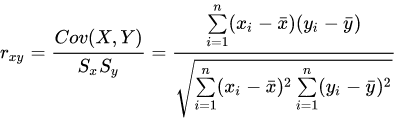

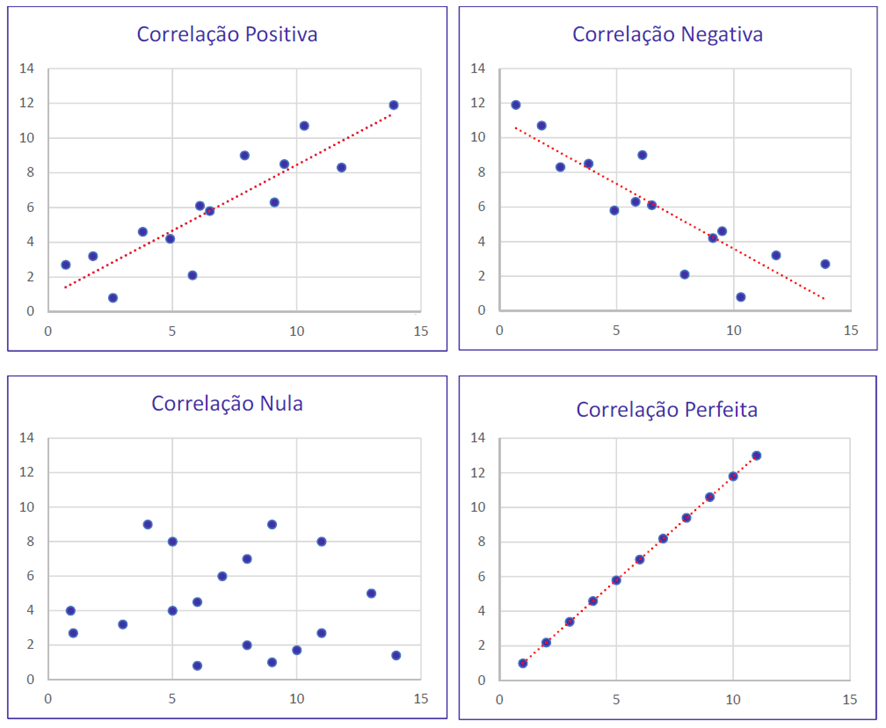

Acima, podemos compreender um pouco mais sobre correlação e como ela funciona.

A correlação positiva acontece quando dois atributos estão muito correlacionados e desta maneira há um indicativo de serem atributos redundantes e os valores de correlação se aproximam de 1.

A correlação negativa acontece quando dois atributos estão muito pouco correlacionados e desta maneira são atributos que contém uma relação inversa à correlação positiva, e assim, os valores de correlação se aproxima de -1

A correlação NULA acontece quando os atributos não contém uma relação entre si, e dessa maneira não estão correlacionados e os valores se aproximam muito de 0

Na tabela abaixo, pode-se verificar um pouco sobre a relaçao entre os coeficientes de correlação e o tipo de correlação dos atributos

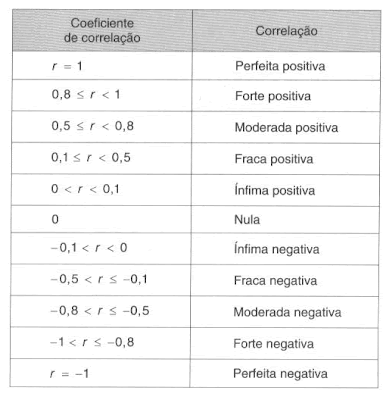

In [33]:
#Retriada/Identificação de atributos numéricos
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

df_numericas = df.select_dtypes(include=numerics)

In [34]:
df_numericas

age  position_cat  market_value  page_views  fpl_value  fpl_points  \
0     28             1          65.0        4329       12.0         264   
1     28             1          50.0        4395        9.5         167   
2     35             4           7.0        1529        5.5         134   
3     28             1          20.0        2393        7.5         122   
4     31             3          22.0         912        6.0         121   
..   ...           ...           ...         ...        ...         ...   
456   21             2           5.0         288        4.5          38   
457   23             3           7.0         199        4.5          34   
458   23             3           4.5         198        4.5          29   
459   21             1           1.0         412        4.5          16   
460   27             1          10.0         214        5.5          12   

     region  new_foreign  age_cat  club_id  big_club  new_signing  
0       3.0            0        4        1         1            0  
1       2.0            0        4        1         1            0  
2       2.0            0        6        1         1            0  
3       1.0            0        4        1         1            0  
4       2.0            0        4        1         1            0  
..      ...          ...      ...      ...       ...          ...  
456     2.0            0        1       20         0            1  
457     4.0            0        2       20         0            1  
458     1.0            0        2       20         0            0  
459     1.0            0        1       20         0            1  
460     4.0            0        3       20         0            0  

[461 rows x 12 columns]

In [35]:
#Função que determina a correlação para cada par de atributos em todo o conjunto de dados e armazena em um novo dataframe
def correlacao(df):

    df_corr = pd.DataFrame(columns=['Nome Col 1', 'Nome Col 2', 'Correlação'])
    index = 0
    for coluna_x in df.columns:
        for coluna_y in df.columns:
            if coluna_x == coluna_y:
                continue
            cor = df[coluna_x].corr(df[coluna_y])
            df_corr.loc[index] = [coluna_x,coluna_y,cor]
            index += 1
    return df_corr

df_corr = correlacao(df_numericas)

In [36]:
df_corr

Nome Col 1    Nome Col 2  Correlação
0            age  position_cat    0.220678
1            age  market_value   -0.132396
2            age    page_views   -0.048682
3            age     fpl_value   -0.097659
4            age    fpl_points    0.187785
..           ...           ...         ...
127  new_signing        region    0.174007
128  new_signing   new_foreign   -0.078193
129  new_signing       age_cat   -0.076102
130  new_signing       club_id    0.134085
131  new_signing      big_club    0.035508

[132 rows x 3 columns]

In [37]:
#Verificar quais correlações são NULAS
df_corr[df_corr['Correlação'].isna()]

Empty DataFrame
Columns: [Nome Col 1, Nome Col 2, Correlação]
Index: []

In [38]:
df_corr.sort_values(['Correlação'], ascending=False)[df_corr['Correlação'] > 0.8]

<ipython-input-38-53fb04f49467>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_corr.sort_values(['Correlação'], ascending=False)[df_corr['Correlação'] > 0.8]


Nome Col 1 Nome Col 2  Correlação
7         age    age_cat    0.972199
88    age_cat        age    0.972199

Felizmente os úncios atributo que contém uma forte relação é o "age" e o "age_cat" que é bem compreensível, visto que os dois representam idades.]

Desta maneira, podemos remover um deles, neste caso o escolhido será age_cat

In [39]:
del df_corr
del df_numericas

In [40]:
df.drop(['age_cat'],axis=1,inplace=True)

## Transformação de atributos

Como estamos lidando com regressão é interessante que os valores que serão trabalhados sejam numéricos

In [41]:
df.dtypes

name             object
club             object
age               int64
position         object
position_cat      int64
market_value    float64
page_views        int64
fpl_value       float64
fpl_sel          object
fpl_points        int64
region          float64
nationality      object
new_foreign       int64
club_id           int64
big_club          int64
new_signing       int64
dtype: object

Dos atributos acima, os seguintes não serão utilizados:

NAME, POSITION, NATIONALITY, CLUB_ID

Além disso CLUB não será utilizado pois seria necessário realizar um One-Hot-Encoding que iria resultar em muitas dimensões (+20) e dessa forma pode ser retirado, vsito que o atributo big_club consegue suprir essa ausência

A mesma coisa para POSITION visto que existe o atributo POSITION_CAP que também consegue suprir essa ausência

In [42]:
df_old = df.copy()

In [43]:
df_old.head()

name     club  age position  position_cat  market_value  \
0     Alexis Sanchez  Arsenal   28       LW             1          65.0   
1         Mesut Ozil  Arsenal   28       AM             1          50.0   
2          Petr Cech  Arsenal   35       GK             4           7.0   
3       Theo Walcott  Arsenal   28       RW             1          20.0   
4  Laurent Koscielny  Arsenal   31       CB             3          22.0   

   page_views  fpl_value fpl_sel  fpl_points  region     nationality  \
0        4329       12.0  17.10%         264     3.0           Chile   
1        4395        9.5   5.60%         167     2.0         Germany   
2        1529        5.5   5.90%         134     2.0  Czech Republic   
3        2393        7.5   1.50%         122     1.0         England   
4         912        6.0   0.70%         121     2.0          France   

   new_foreign  club_id  big_club  new_signing  
0            0        1         1            0  
1            0        1         1            0  
2            0        1         1            0  
3            0        1         1            0  
4            0        1         1            0

In [44]:
df = df.drop(['name','club','nationality','club_id','position'],axis=1)

In [45]:
df.dtypes

age               int64
position_cat      int64
market_value    float64
page_views        int64
fpl_value       float64
fpl_sel          object
fpl_points        int64
region          float64
new_foreign       int64
big_club          int64
new_signing       int64
dtype: object

Ainda temos um atributo de string que representa uma porcentagem e pode ser facilmente modificado

In [46]:
df['fpl_sel'] = df['fpl_sel'].str.rstrip('%').astype('float') / 100

In [47]:
df.dtypes

age               int64
position_cat      int64
market_value    float64
page_views        int64
fpl_value       float64
fpl_sel         float64
fpl_points        int64
region          float64
new_foreign       int64
big_club          int64
new_signing       int64
dtype: object

Agora sim podemos continuar

## Verificação dos outros atributos

A maioria dos atributos pareceu bem coerente durante a análise inicial dos atributos. Entretanto 3 atributos pareceram "estranhos" e serão analisados separadamente nesta área. Os 3 atributos relacionados ao Fantasy Team

O interessante é isto, para jogador que já jogaram a Liga não há problema, visto que ele obtiveram uma pontuação na temporada passada, entretanto como definir isto corretamente para novos jogadres e como isto está para novos jogadores. Vamos verificar

In [48]:
df[df['new_foreign'] == 1][['fpl_value','fpl_sel','fpl_points']]

fpl_value  fpl_sel  fpl_points
26         6.0    0.069           0
27        10.5    0.265           0
110        6.0    0.064           0
111        5.0    0.016           0
159        7.5    0.036           0
160        7.5    0.021           0
212        6.0    0.008           0
237        9.0    0.124           0
258        5.5    0.045           0
259        8.0    0.046           0
284        5.5    0.170           0
328        4.5    0.004           0
374        4.5    0.009           0
417        4.5    0.003           0
419        5.0    0.006           0
438        4.5    0.013           0

In [49]:
df[df['new_signing'] == 1][['fpl_value','fpl_sel','fpl_points']]

fpl_value  fpl_sel  fpl_points
8          5.5    0.040          90
19         5.0    0.017          32
21         7.5    0.001          20
81         5.5    0.002          76
83         5.5    0.002          54
..         ...      ...         ...
444        7.0    0.034          89
453        5.5    0.002          55
456        4.5    0.004          38
457        4.5    0.002          34
459        4.5    0.059          16

[67 rows x 3 columns]

Podemos verificar que os dois primeiros atributos podem ser entendidos como coerentes, pois representam o valor do jogador pelo o que ele jogou anteriormente, entretanto caso o jogador nunca tenha jogador PL ele não terá um total, que pode prejudicar o modelo, assim é necessário tomar alguma decisão

In [50]:
df[(df['new_signing'] == 1) & (df['fpl_points'] == 0)]

age  position_cat  market_value  page_views  fpl_value  fpl_sel  \
109   34             1          0.05         467        5.0    0.001   

     fpl_points  region  new_foreign  big_club  new_signing  
109           0     2.0            0         1            1

Neste caso, onde o jogador é uma nova contratação que já jogava na Inglaterra mas contém pontos 0 é aceitável, pois o jogador não jogou durante a temporada passada. Logo OK. O problema são os jogadores recém contratados de ligas estrangeiras que podem ter seu valor abaixado caso isto aconteça

Para isto, temos várias soluções:

1 - Excluir o atributo

Pode não ser a solução ideal, visto que este atributo representa a performance do jogador

2- Excluir os exemplos

NÃO, já que eles são todos os representantes do atributo new_foreign == 1

3 - Gerar valores artificias

Interessante


In [51]:
df[df['new_foreign'] == 1]

age  position_cat  market_value  page_views  fpl_value  fpl_sel  \
26    24             3          15.0         618        6.0    0.069   
27    26             1          40.0        1183       10.5    0.265   
110   24             3          25.0         454        6.0    0.064   
111   22             2          16.0        1011        5.0    0.016   
159   24             1          18.0         428        7.5    0.036   
160   22             1          10.0         373        7.5    0.021   
212   29             2           9.0         253        6.0    0.008   
237   25             1          35.0        1117        9.0    0.124   
258   23             4          22.0         297        5.5    0.045   
259   22             1          40.0        1098        8.0    0.046   
284   23             3          22.0         950        5.5    0.170   
328   21             3           0.5           9        4.5    0.004   
374   28             2          12.0         110        4.5    0.009   
417   26             3           4.0          74        4.5    0.003   
419   22             2           8.0         258        5.0    0.006   
438   26             3           1.0          82        4.5    0.013   

     fpl_points  region  new_foreign  big_club  new_signing  
26            0     2.0            1         1            0  
27            0     2.0            1         1            0  
110           0     2.0            1         1            0  
111           0     2.0            1         1            0  
159           0     2.0            1         0            0  
160           0     2.0            1         0            0  
212           0     2.0            1         0            0  
237           0     4.0            1         1            0  
258           0     3.0            1         1            0  
259           0     2.0            1         1            0  
284           0     2.0            1         1            0  
328           0     2.0            1         0            0  
374           0     2.0            1         0            0  
417           0     2.0            1         0            0  
419           0     1.0            1         0            0  
438           0     4.0            1         0            0

Podemos pegar jogadores com valores semelhantes para comparar

In [52]:
def create_total(index,att):

  val,sel,pos = df.loc[index,['fpl_value','fpl_sel','position_cat']].values

  a = df[(df['new_foreign'] == 0) & (df['fpl_value'] < val+0.5) & (df['fpl_sel'] < sel) & (df['position_cat'] == pos)]
  
  return a['fpl_points'].max() - a['fpl_points'].std()

In [53]:
indexes = df[df['new_foreign'] == 1].index
att = 'fpl_points'

In [54]:
for i in indexes:

  points = create_total(i,att)

  df.loc[i,att] = float(points)


In [55]:
df[df['new_foreign'] == 1]

age  position_cat  market_value  page_views  fpl_value  fpl_sel  \
26    24             3          15.0         618        6.0    0.069   
27    26             1          40.0        1183       10.5    0.265   
110   24             3          25.0         454        6.0    0.064   
111   22             2          16.0        1011        5.0    0.016   
159   24             1          18.0         428        7.5    0.036   
160   22             1          10.0         373        7.5    0.021   
212   29             2           9.0         253        6.0    0.008   
237   25             1          35.0        1117        9.0    0.124   
258   23             4          22.0         297        5.5    0.045   
259   22             1          40.0        1098        8.0    0.046   
284   23             3          22.0         950        5.5    0.170   
328   21             3           0.5           9        4.5    0.004   
374   28             2          12.0         110        4.5    0.009   
417   26             3           4.0          74        4.5    0.003   
419   22             2           8.0         258        5.0    0.006   
438   26             3           1.0          82        4.5    0.013   

     fpl_points  region  new_foreign  big_club  new_signing  
26    89.872266     2.0            1         1            0  
27   165.289561     2.0            1         1            0  
110   89.725989     2.0            1         1            0  
111   57.794580     2.0            1         1            0  
159  103.563492     2.0            1         0            0  
160  106.458079     2.0            1         0            0  
212   67.998948     2.0            1         0            0  
237  129.611343     4.0            1         1            0  
258   70.749863     3.0            1         1            0  
259  128.738004     2.0            1         1            0  
284   90.719795     2.0            1         1            0  
328   40.431401     2.0            1         0            0  
374   41.270733     2.0            1         0            0  
417   40.332952     2.0            1         0            0  
419   54.059868     1.0            1         0            0  
438   65.101020     4.0            1         0            0

# Relação das variáveis com o valor de mercado

In [56]:
uni = df.copy()

In [57]:
uni.columns

Index(['age', 'position_cat', 'market_value', 'page_views', 'fpl_value',
       'fpl_sel', 'fpl_points', 'region', 'new_foreign', 'big_club',
       'new_signing'],
      dtype='object')

### Age

<Axes: xlabel='age', ylabel='market_value'>

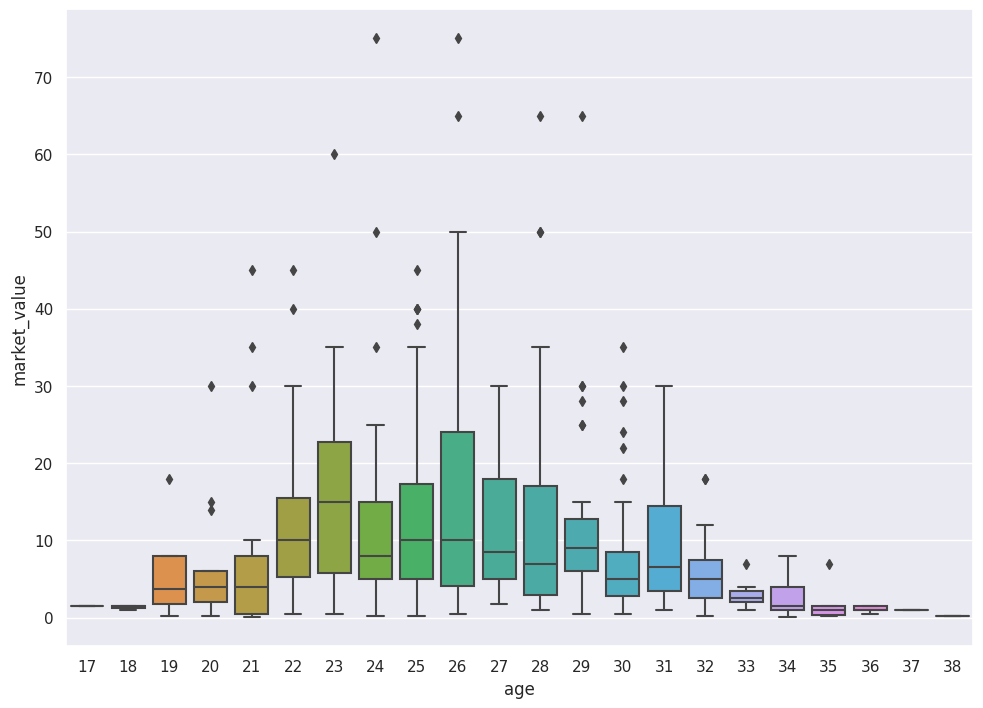

In [58]:
sns.boxplot(x = uni['age'],y = uni['market_value'])

Acima podemos verificar que os jogadores mais valiosos estão localizados entr 23 à 28 anos, o que de certa forma é esperado, visto que neste intervalo de idades os jogadores estão nos seus melhores momentos, exceto por alguns casos isolados.

Dessa maneira, pode-se perceber que o atributo idade pode ter uma grande influência sobre o preço de mercado do jogador.

Podemos traçar a reta que demonstra esta relação

In [59]:
X = np.array(uni['age']).reshape(-1, 1)
y = np.array(uni['market_value']).reshape(-1, 1)

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)


In [61]:
regr = LinearRegression()
 
regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))

-0.0036457809834362642


In [62]:
y_pred = regr.predict(X_test)

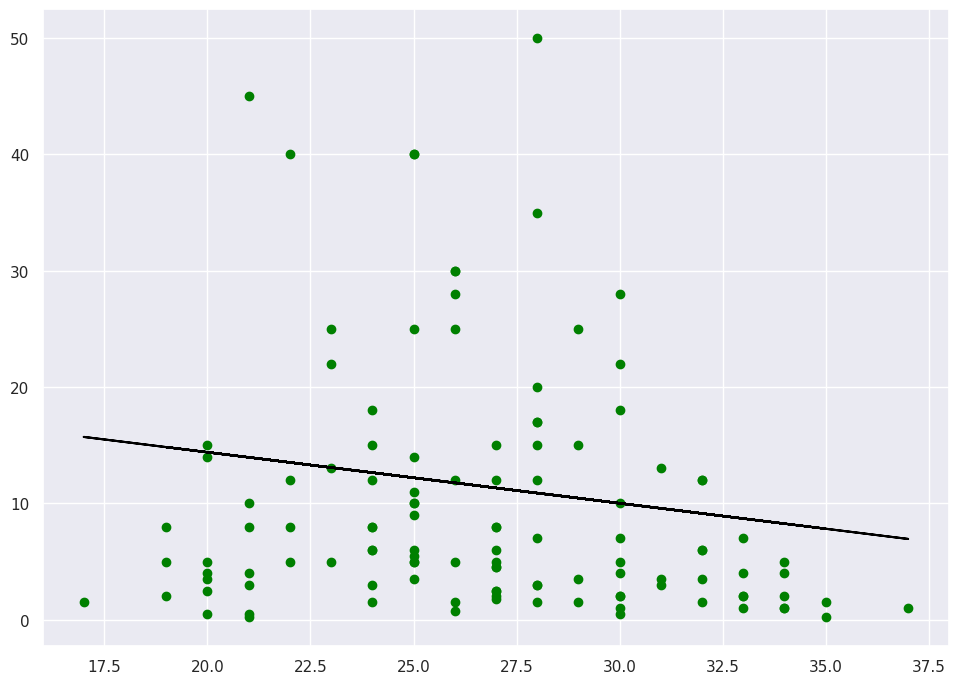

In [63]:
plt.scatter(X_test, y_test, color ='green')
plt.plot(X_test, y_pred, color ='black')
 
plt.show()

In [64]:

from sklearn.metrics import mean_absolute_error,mean_squared_error
 
mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
#squared True returns MSE value, False returns RMSE value.
mse = mean_squared_error(y_true=y_test,y_pred=y_pred) #default=True
rmse = mean_squared_error(y_true=y_test,y_pred=y_pred,squared=False)
 
print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 8.21182015806846
MSE: 108.7997785852293
RMSE: 10.430713234732767


Os resultados obtidos não foram bons e desta maneira, percebe-se que mesmo que haja uma relação clara entre idade e valor de mercado, ela não é tão boa para predizer, apenas podemos compreender que a medida que o jogador envelhece, seu valor de mercado tende a diminuir.

### Position Cat

[Text(0, 0, 'ATCK'), Text(1, 0, 'MEIO'), Text(2, 0, 'DEF'), Text(3, 0, 'GOL')]

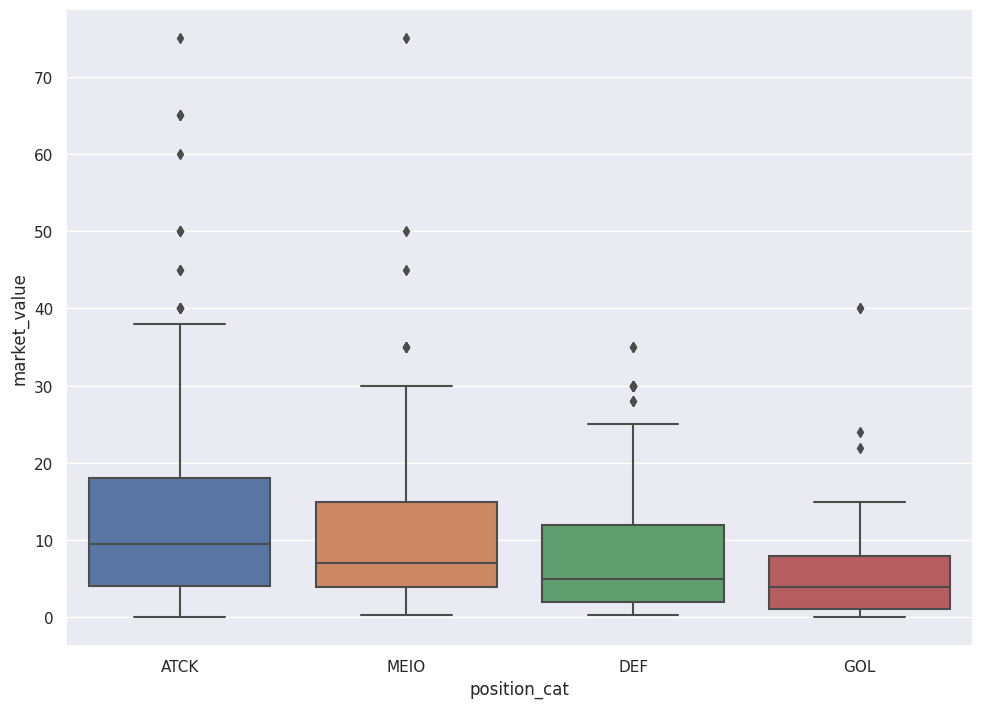

In [65]:
#1 é para atacantes

#2 para meios de campo

#3 para defensores

#4 para goleiros

ax = sns.boxplot(x = uni['position_cat'],y = uni['market_value'])
ax.set_xticklabels(['ATCK', 'MEIO', 'DEF','GOL'])

Esta relação é bem intuitiva de se pensar. Isto acontece pois a maioria dos jogadores do ataque são os que fazem gols e desta maneira tendem a se destacar no time e ter um valor de mercado mais alto, enquanto os jogadores de partes mais defensivas tendem a ter um pouco menos de destaque e desta maneira ter um valor um pouco menor. Isto é muito perceptível para os goleiros, que geralmente tem muito pouco destaque.

In [66]:
X = np.array(uni['position_cat']).reshape(-1, 1)
y = np.array(uni['market_value']).reshape(-1, 1)

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)


In [68]:
regr = LinearRegression()
 
regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))

0.0005716605384189499


In [69]:
y_pred = regr.predict(X_test)

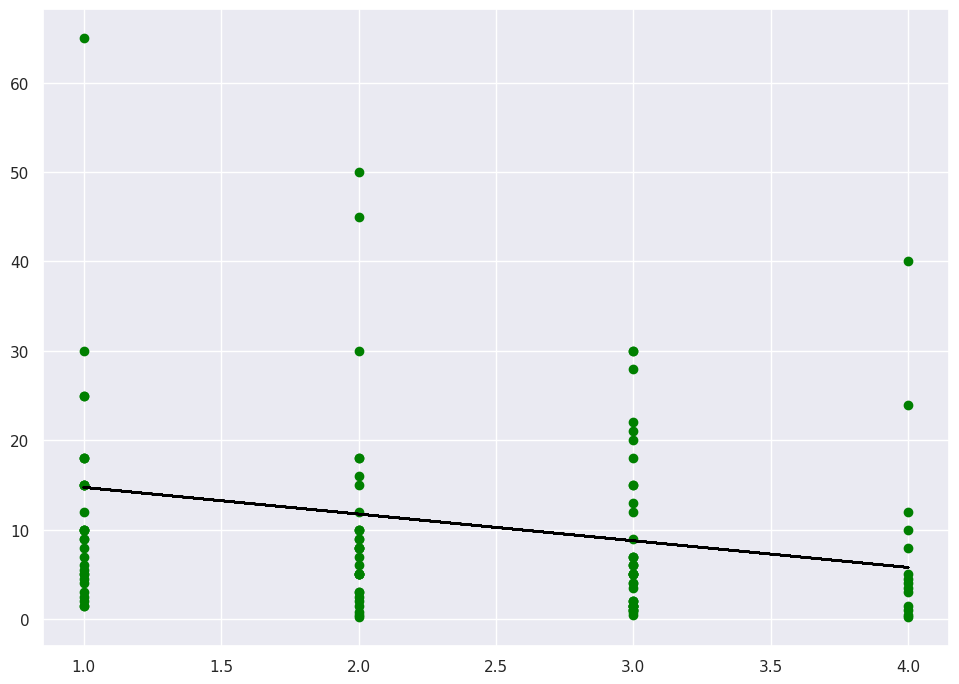

In [70]:
plt.scatter(X_test, y_test, color ='green')
plt.plot(X_test, y_pred, color ='black')
 
plt.show()

Neste caso podemos claramente comprender que existe uma relação muito poderosa entre a parte do campo em que o jogador joga com seu valor de mercado e esta relação é bem forte.

Isto não parece tão interessante, pois como se trata de uma variável discreta, ou seja um valor inteiro, ele irá predizer o mesmo valor caso X seja igual, oque não é nada interessante

In [71]:
ind = np.where(X_test == 1)

y_pred[ind]

array([14.73342753, 14.73342753, 14.73342753, 14.73342753, 14.73342753,
       14.73342753, 14.73342753, 14.73342753, 14.73342753, 14.73342753,
       14.73342753, 14.73342753, 14.73342753, 14.73342753, 14.73342753,
       14.73342753, 14.73342753, 14.73342753, 14.73342753, 14.73342753,
       14.73342753, 14.73342753, 14.73342753, 14.73342753, 14.73342753,
       14.73342753, 14.73342753, 14.73342753, 14.73342753, 14.73342753,
       14.73342753])

In [72]:
ind = np.where(X_test == 2)

y_pred[ind]

array([11.7487783, 11.7487783, 11.7487783, 11.7487783, 11.7487783,
       11.7487783, 11.7487783, 11.7487783, 11.7487783, 11.7487783,
       11.7487783, 11.7487783, 11.7487783, 11.7487783, 11.7487783,
       11.7487783, 11.7487783, 11.7487783, 11.7487783, 11.7487783,
       11.7487783, 11.7487783, 11.7487783, 11.7487783, 11.7487783,
       11.7487783, 11.7487783, 11.7487783, 11.7487783, 11.7487783,
       11.7487783, 11.7487783])

In [73]:
ind = np.where(X_test == 3)

y_pred[ind]

array([8.76412907, 8.76412907, 8.76412907, 8.76412907, 8.76412907,
       8.76412907, 8.76412907, 8.76412907, 8.76412907, 8.76412907,
       8.76412907, 8.76412907, 8.76412907, 8.76412907, 8.76412907,
       8.76412907, 8.76412907, 8.76412907, 8.76412907, 8.76412907,
       8.76412907, 8.76412907, 8.76412907, 8.76412907, 8.76412907,
       8.76412907, 8.76412907, 8.76412907, 8.76412907, 8.76412907,
       8.76412907, 8.76412907, 8.76412907, 8.76412907, 8.76412907,
       8.76412907, 8.76412907, 8.76412907, 8.76412907])

In [74]:
ind = np.where(X_test == 4)

y_pred[ind]

array([5.77947985, 5.77947985, 5.77947985, 5.77947985, 5.77947985,
       5.77947985, 5.77947985, 5.77947985, 5.77947985, 5.77947985,
       5.77947985, 5.77947985, 5.77947985, 5.77947985])

### Page Views

Essa variável parece ser interessante por um simples motivo, como se trata de médias é uma variável contínua e desta maneira não haverá problemas como nas outras duas acima

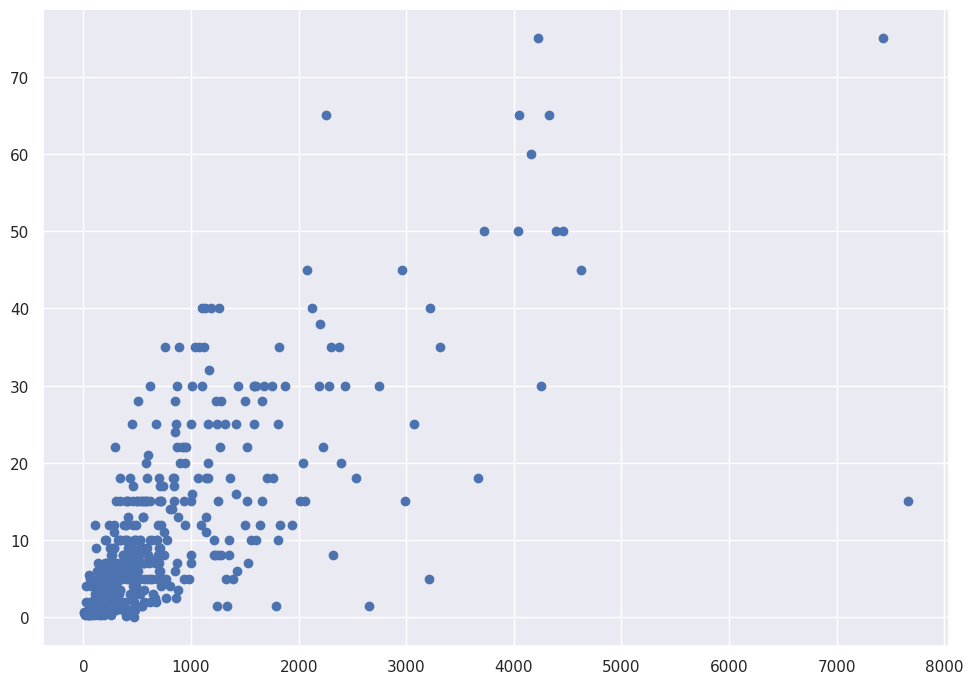

In [75]:

plt.scatter(uni['page_views'], uni['market_value'])


In [76]:
X = np.array(uni['page_views']).reshape(-1, 1)
y = np.array(uni['market_value']).reshape(-1, 1)

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)


In [78]:
regr = LinearRegression()
 
regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))

0.5011626747759281


In [79]:
y_pred = regr.predict(X_test)

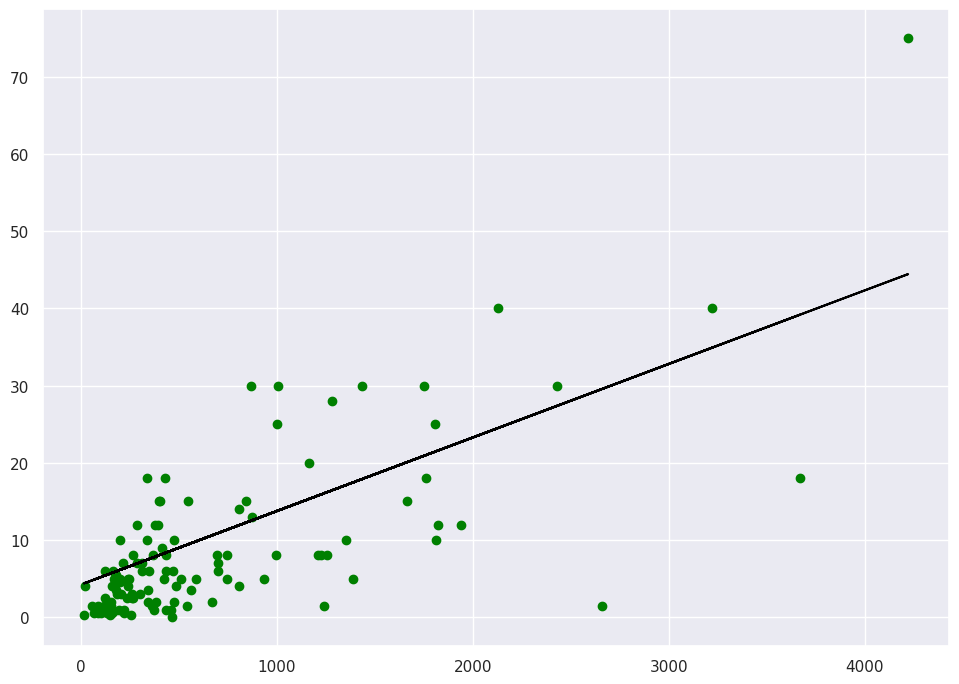

In [80]:
plt.scatter(X_test, y_test, color ='green')
plt.plot(X_test, y_pred, color ='black')
 
plt.show()

Agora sim, uma relação bem melhor que consegue analisar um pouco melhor. Isto era o esperado de se acontecer, visto que quanto mais procurado um jogador é na internet, ele tende a estar mais no "hype" e isto geralmente acontece quando ele está performando bem e é famoso, resultando em um grande valor de mercado.

Vamos ver como o modelo se comportou

In [81]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
 
mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
#squared True returns MSE value, False returns RMSE value.
mse = mean_squared_error(y_true=y_test,y_pred=y_pred) #default=True
rmse = mean_squared_error(y_true=y_test,y_pred=y_pred,squared=False)
 
print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 5.560926120108797
MSE: 55.52842570238521
RMSE: 7.451739776883329


In [82]:
r2_score(y_test,y_pred)

0.5011626747759281

O modelo foi melhor que os dois anteriores mas ainda não conseguiu desempenhar bem, mas isto acontece pelo fato de conter apenas uma variável o que tende e deixar o modelo um pouco incerto

### FPL VALUE

ESte atributo tem grande potencial, pois indica diretamente como o jogador performa, funcionando como uma nota para o jogador.

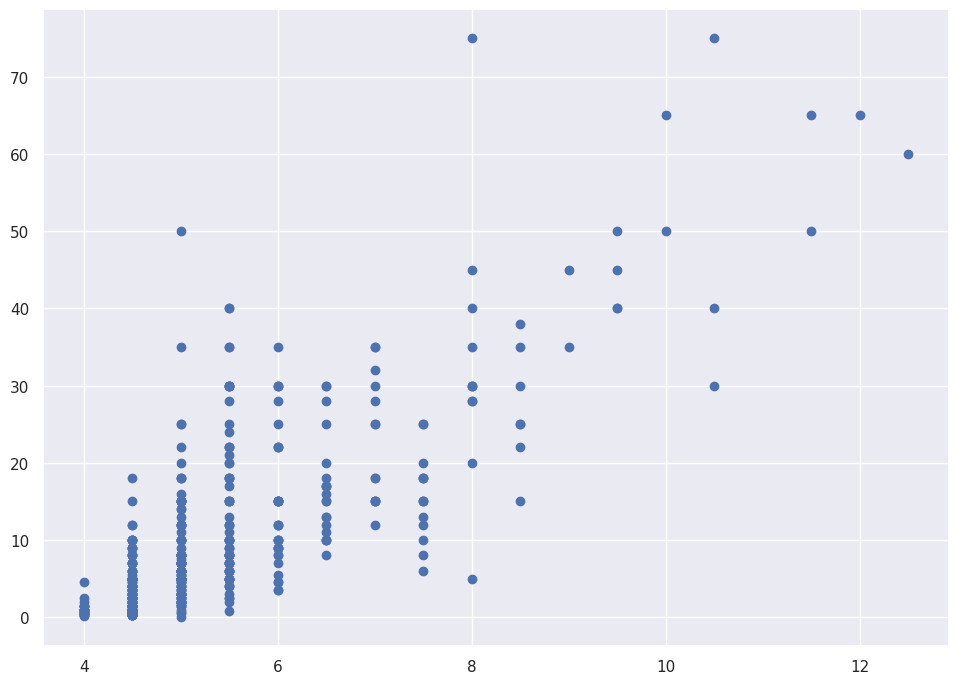

In [83]:

plt.scatter(uni['fpl_value'], uni['market_value'])


In [84]:
X = np.array(uni['fpl_value']).reshape(-1, 1)
y = np.array(uni['market_value']).reshape(-1, 1)

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)


In [86]:
regr = LinearRegression()
 
regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))

0.6717316463040301


In [87]:
y_pred = regr.predict(X_test)

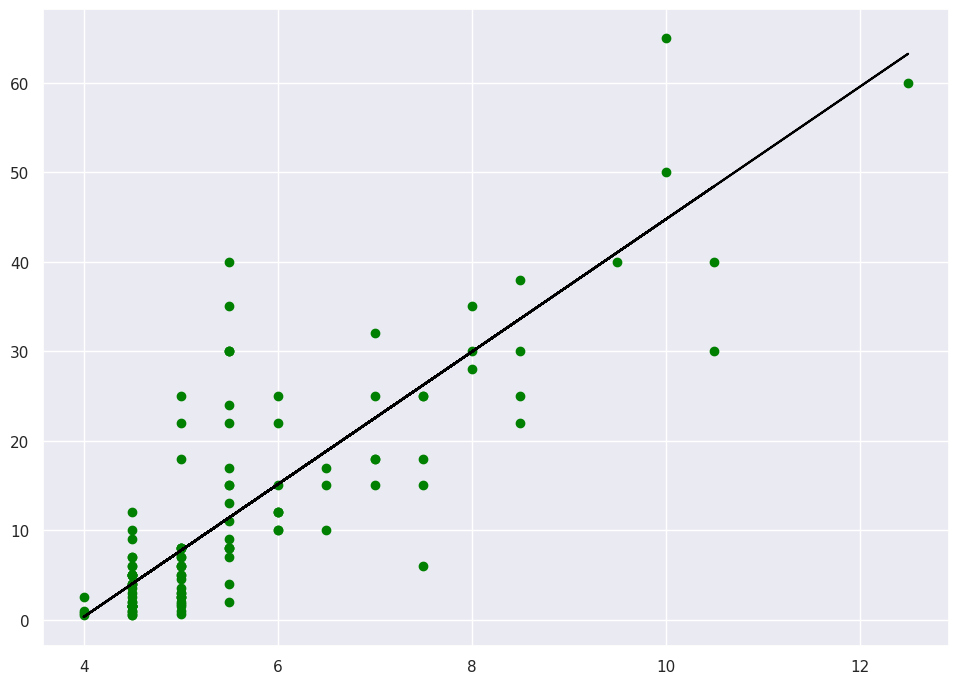

In [88]:
plt.scatter(X_test, y_test, color ='green')
plt.plot(X_test, y_pred, color ='black')
 
plt.show()

In [89]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
 
mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
#squared True returns MSE value, False returns RMSE value.
mse = mean_squared_error(y_true=y_test,y_pred=y_pred) #default=True
rmse = mean_squared_error(y_true=y_test,y_pred=y_pred,squared=False)
 
print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 5.103116429590083
MSE: 55.66229059267021
RMSE: 7.460716493251182


Podemos compreender que este atributo também teve uma forte relação com o valor de mercado e pode ser futuramente utilizado na análise final

### FPL SEL

Este atributo não será estudado , pois ele não representa quase nada sozinho, visto que a taxa de venda, algo que não tem um valor

### FPL POINTS

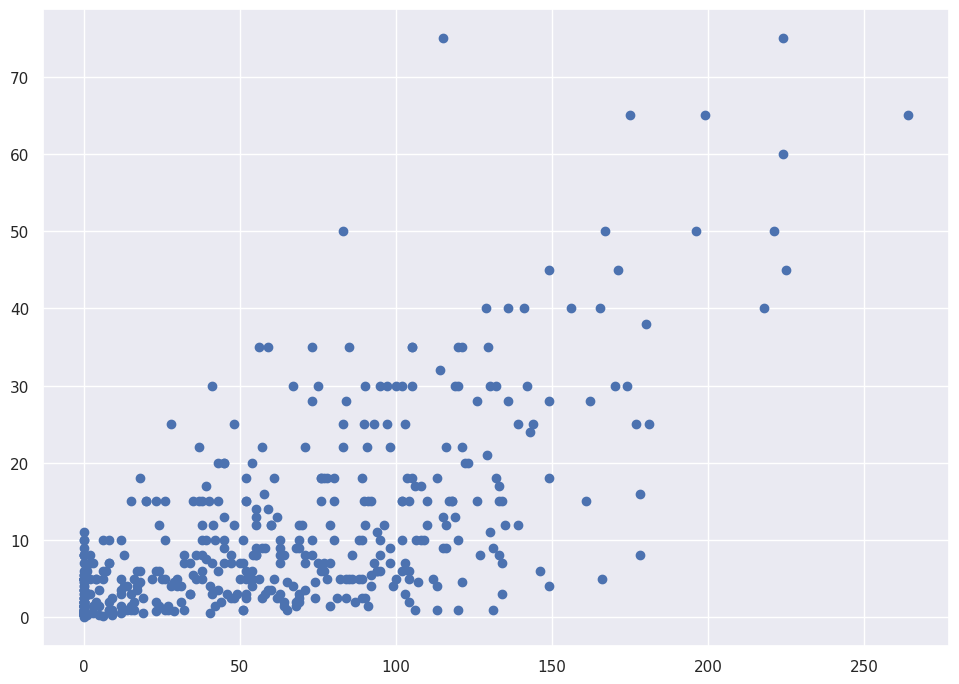

In [90]:

plt.scatter(uni['fpl_points'], uni['market_value'])


In [91]:
X = np.array(uni['fpl_points']).reshape(-1, 1)
y = np.array(uni['market_value']).reshape(-1, 1)

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)


In [93]:
regr = LinearRegression()
 
regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))

0.40791812401388616


In [94]:
y_pred = regr.predict(X_test)

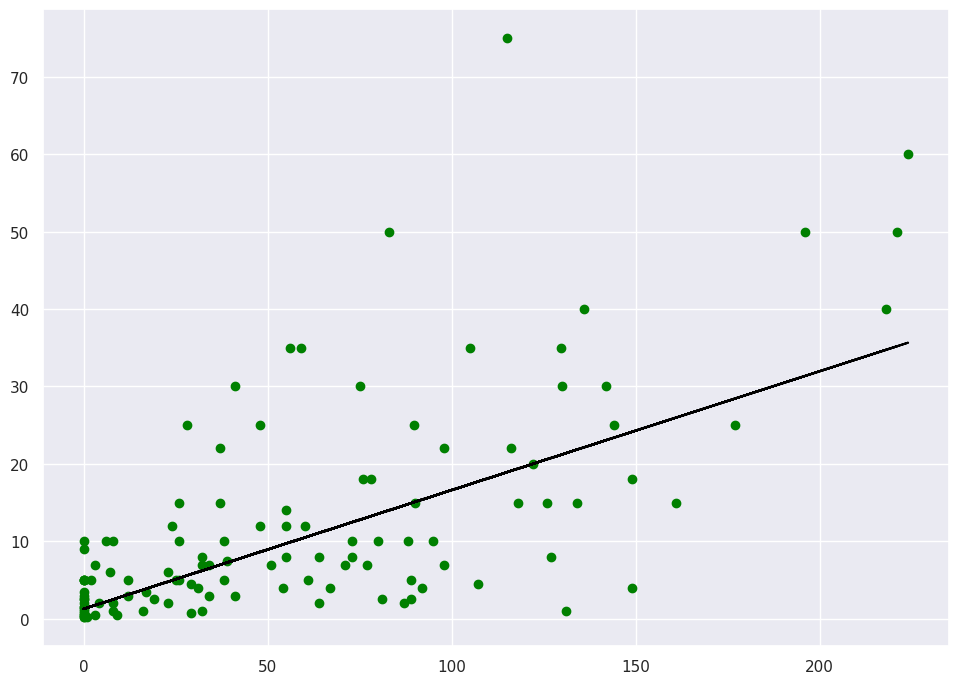

In [95]:
plt.scatter(X_test, y_test, color ='green')
plt.plot(X_test, y_pred, color ='black')
 
plt.show()

In [96]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
 
mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
#squared True returns MSE value, False returns RMSE value.
mse = mean_squared_error(y_true=y_test,y_pred=y_pred) #default=True
rmse = mean_squared_error(y_true=y_test,y_pred=y_pred,squared=False)
 
print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 6.7945229392219435
MSE: 112.23169147081737
RMSE: 10.593945982060573


Este atributo tinha muito potencial, mas infelizmente não funcionou muito bem sozinho

## Conclusões

Percebe-se claramente que as variáveis discretas não agregam muito valor, tanto que algumas variáveis binárias nem foram analisadas.

As variáveis contínuas consegue realizar isto de uma melhor maneira mas ainda assim, quando sozinhas não consegue gerar um modelo muito bom.

# Normalização

Finalmente é necessário normalizar os atributos para evitar qualquer tipo de problema.

In [97]:
from sklearn.preprocessing import MinMaxScaler


Nesta etapa iremos construir diversos datasets que serão testados, todos normalizados.

1. Todos os atributos
2. Remover atributos binários
3. Remover fpl_points
4. Remover binários + fpl_points


In [98]:
def norm(df):
  scaler = MinMaxScaler()

  y = df['market_value']
  df = df.drop('market_value',axis=1)
  scaler.fit(df)

  X = scaler.transform(df)

  return X,y

In [99]:
df1 = df.drop(['new_foreign','big_club','new_signing'],axis=1)
df2 = df.drop('fpl_points',axis=1)
df3 = df.drop(['new_foreign','big_club','new_signing','fpl_points'],axis=1)

In [100]:
l = [df,df1,df2,df3]
y_l = [
    
]
x_l = [
    
]

for i in l:
  x,p = norm(i)
  x_l.append(x)
  y_l.append(p)

Esta tarefa foi concluída com êxito e agora temos os dados todos estruturados e prontos para serem aplicados no modelo

# Regressão Linear

In [101]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split



In [102]:
def reg(x,y,nro):
  X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=101) 
  model = LinearRegression()
  model.fit(X_train,y_train.values)
  predictions = model.predict(X_test)


  # model evaluation
  print(
    'mean_squared_error : ', mean_squared_error(y_test.values, predictions))
  print(
    'mean_absolute_error : ', mean_absolute_error(y_test.values, predictions))
  
  print(f"R2-SCORE = {r2_score(y_test.values,predictions)}")

  plt.plot(predictions,color='red',label='Predicted market value')
  plt.plot(y_test.values,color='green',label='Real market value')

  plt.legend()

  plt.title(f"Results for estrategy {nro}")
  plt.ylabel("Market value in Million")
  plt.xlabel("Player")

  plt.show()


In [103]:
x_l[1].shape

(461, 7)

mean_squared_error :  39.49300007872183
mean_absolute_error :  4.481213305395837
R2-SCORE = 0.7209220067084467


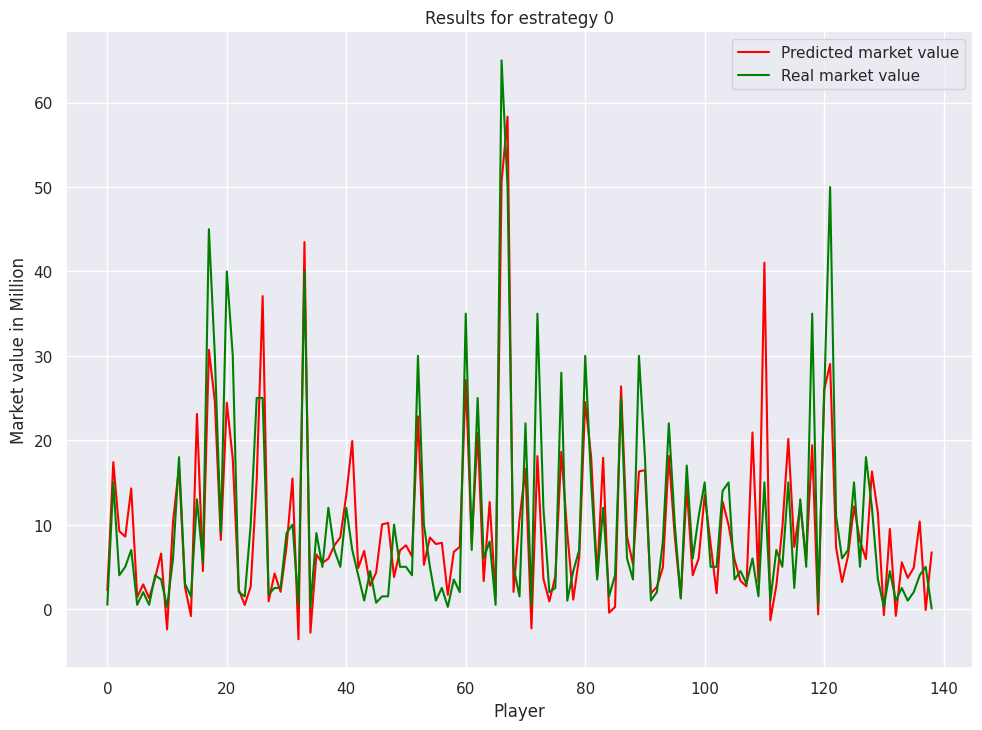

mean_squared_error :  47.8086859910893
mean_absolute_error :  4.645340285984806
R2-SCORE = 0.6621590630819705


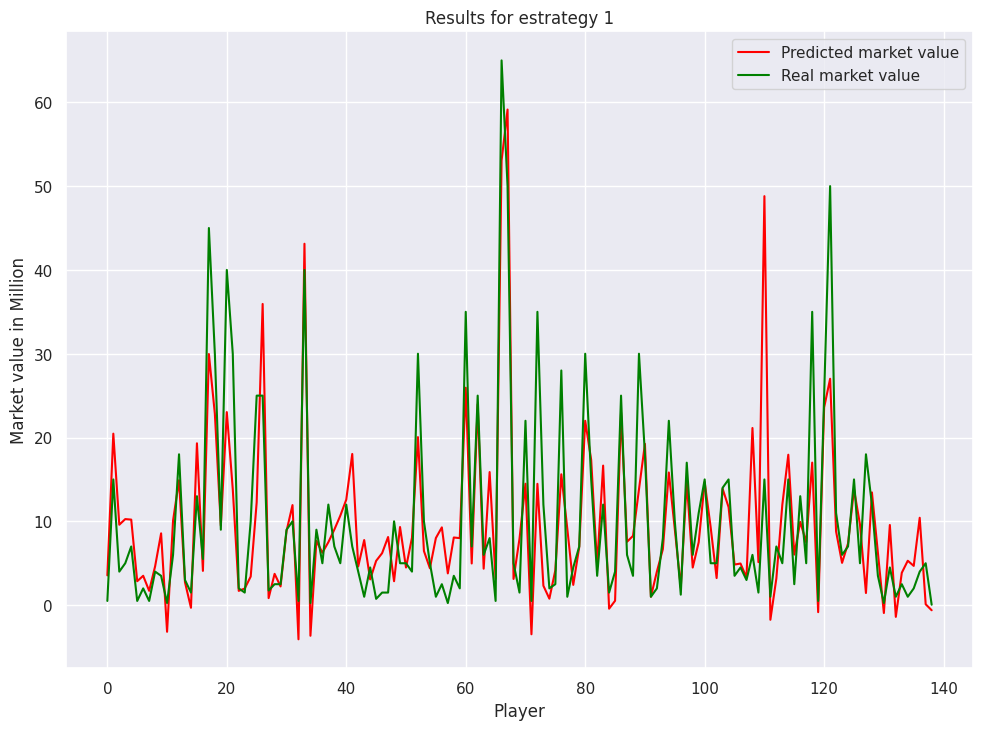

mean_squared_error :  42.0053587968274
mean_absolute_error :  4.524169360132486
R2-SCORE = 0.7031683787723608


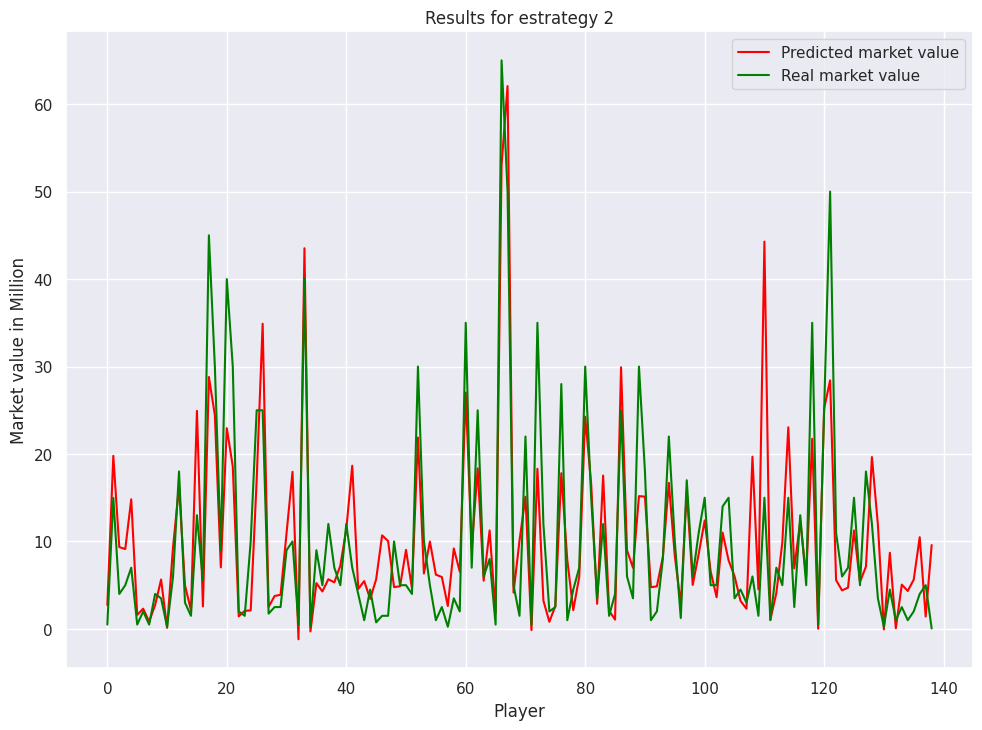

mean_squared_error :  50.14023079770112
mean_absolute_error :  4.653025547863439
R2-SCORE = 0.6456831598940244


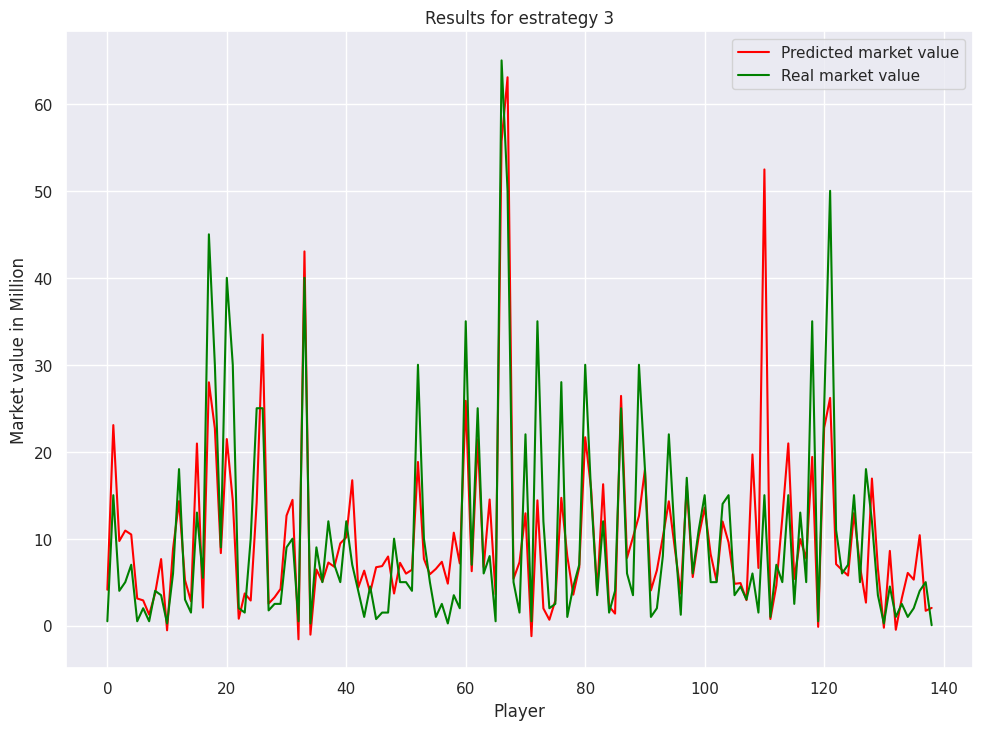

In [104]:
for i in range(len(y_l)):

  reg(x_l[i],y_l[i],i)

# Analise do R2-Score

Após a realização dos experimentos é interessante interpretar os resultados, principlamente o que a medida de R2-SCORE representa e o quão bom foram os resultados obtidos.

Para podersmos compreender um pouco, devemos entender o que é o R2-SCORE.


Essa medidade mede a disposição de todos os pontos ao redor da reta de regressão ajustada. Esta medida também é chamada de coeficiente de determinação. Para um conjunto de dados, valores maiores de R2 representam menores diferenças observadas entre os dados observados com a reta ajustada. É interessante notar que os possíveis valores para R2 vão de 0 à 1.

Assim, um R2-SCORE de 0 representa que um modelo não é capaz de explicar nenhum variação dos dados nas variáveis do conjunto de dados. Já, um R2-SCORE DE 1 demostra um modelo que representa todas as variações relacionadas a variação das médias, o que também não é tão interessante já que pode indicar overfitting.


Geralmente, quanto maior R2 melhor o modelo de regressão foi construído com base nos dados.


Desta maneira, obteve-se um R2 de aproximadamente 0.7, oque é interessante, mas poderia ser um pouco melhor. Dessa menria é interessante pensar em alguma solução que permite que o modelo seja melhorado.

# Combinação de modelos

Os resultados obtidos acima não foram tão satisfatõrios, um erro de 0.7, assim a combinação de classificadores será utilizado para que seja possível melhorar esta medida e assim fazer com que a regressão consiga prever melhor os resultados

Nesta etapa iremos construir diversos datasets que serão testados, todos normalizados.

1. Todos os atributos
2. Remover atributos binários
3. Remover fpl_points
4. Remover binários + fpl_points


In [105]:
def norm(df):
  scaler = MinMaxScaler()

  y = df['market_value']
  df = df.drop('market_value',axis=1)
  scaler.fit(df)

  X = scaler.transform(df)

  return X,y

In [106]:
df1 = df.drop(['new_foreign','big_club','new_signing'],axis=1)
df2 = df.drop('fpl_points',axis=1)
df3 = df.drop(['new_foreign','big_club','new_signing','fpl_points'],axis=1)

In [107]:
l = [df,df1,df2,df3]
y_l = [
    
]
x_l = [
    
]

for i in l:
  x,p = norm(i)
  x_l.append(x)
  y_l.append(p)

In [108]:
from sklearn.ensemble import GradientBoostingRegressor

Para realizar a combinação de modelos de regressão iremos utilizar o GradientBoostingRegressor que....

Além disso, a loss function que será utilizada para combinar os modelos será o erro quadrático, que é a mais usual para a tarefa de regressão

In [109]:
def ensemble_reg(x,y,iters,nro):

  X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=101) 

  est = GradientBoostingRegressor(
     n_estimators=iters, learning_rate=0.1, max_depth=1, random_state=0,
     loss='squared_error')
  
  est.fit(X_train,y_train)
  predictions = est.predict(X_test)


  # model evaluation
  print(
    'mean_squared_error : ', mean_squared_error(y_test.values, predictions))
  print(
    'mean_absolute_error : ', mean_absolute_error(y_test.values, predictions))
  
  print(f"R2-SCORE = {r2_score(y_test.values,predictions)}")

  plt.plot(predictions,color='red',label='Predicted market value')
  plt.plot(y_test.values,color='green',label='Real market value')

  plt.legend()

  plt.title(f"Results for estrategy {nro}")
  plt.ylabel("Market value in Million")
  plt.xlabel("Player")

  plt.show()


mean_squared_error :  43.82862509464525
mean_absolute_error :  4.426818142713811
R2-SCORE = 0.6902842347818596


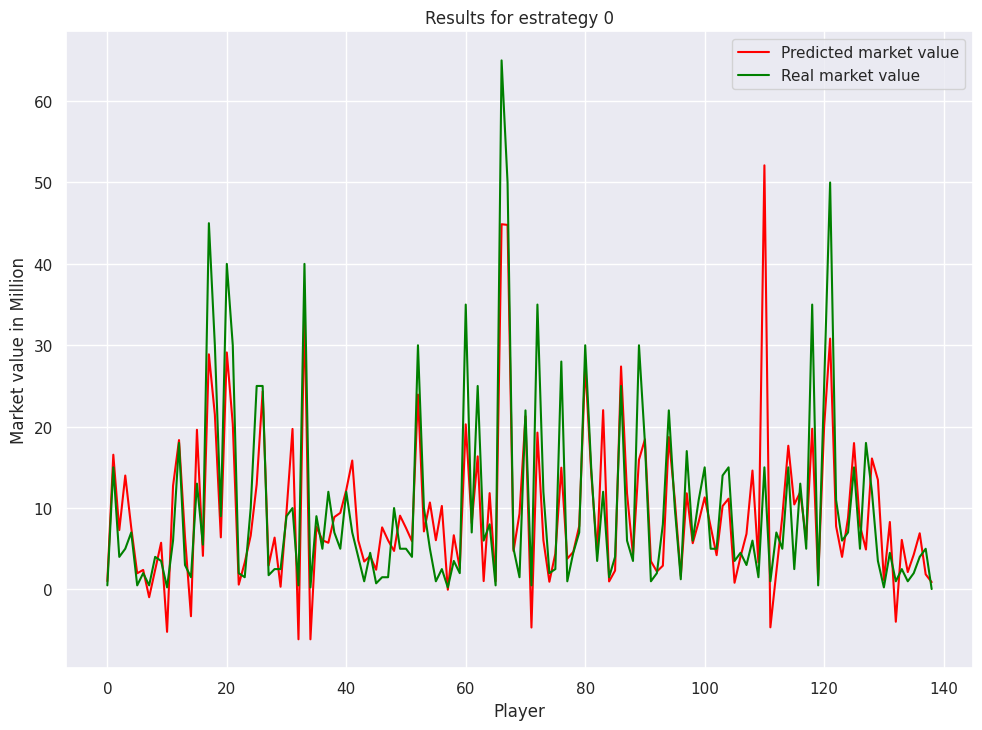

mean_squared_error :  51.05367217953496
mean_absolute_error :  4.699864958757668
R2-SCORE = 0.6392283099883825


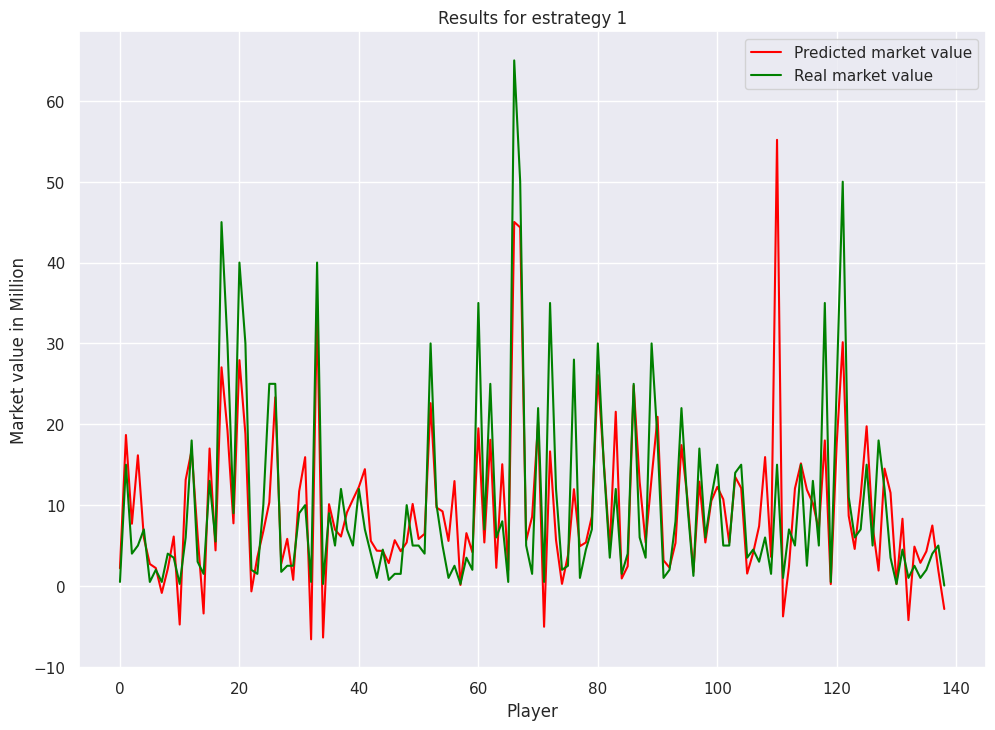

mean_squared_error :  39.12773486096624
mean_absolute_error :  4.208191631255781
R2-SCORE = 0.7235031599200852


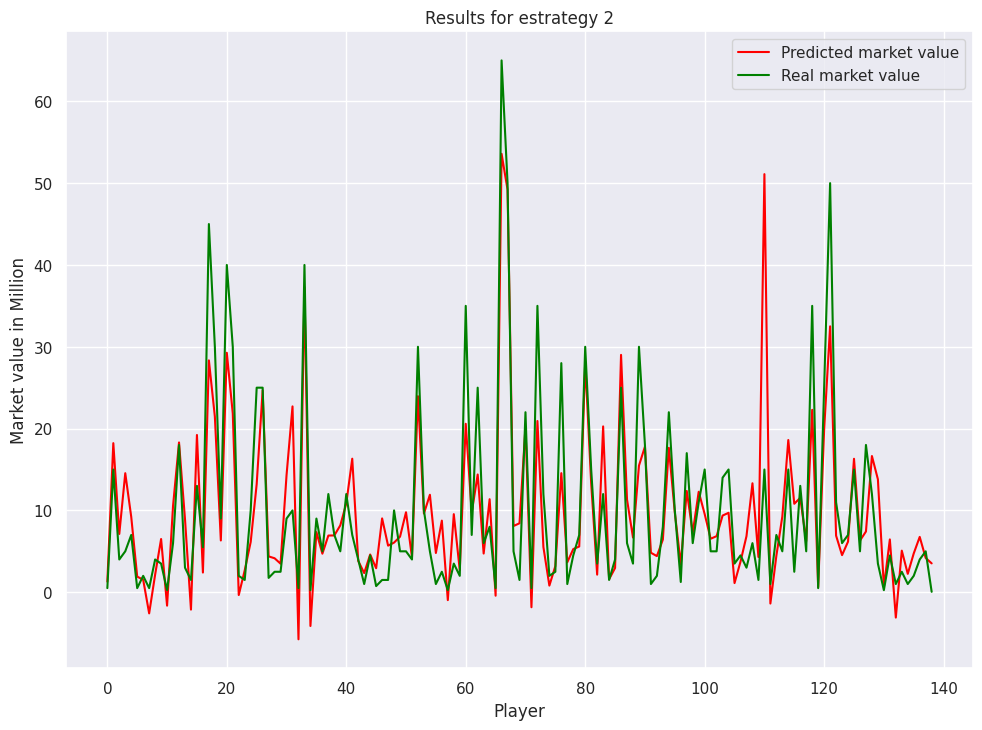

mean_squared_error :  45.068108056818566
mean_absolute_error :  4.469338315828398
R2-SCORE = 0.681525406201785


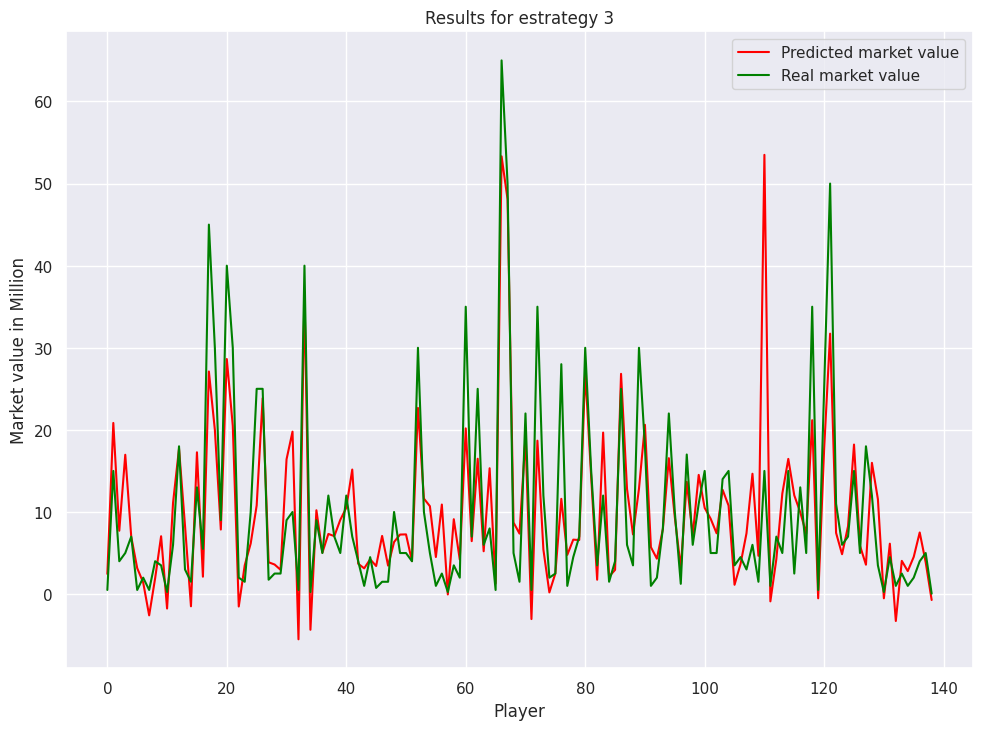

In [110]:
for i in range(len(y_l)):

  ensemble_reg(x_l[i],y_l[i],200,i)

Com a combinação de modelos acima, foi possível compreender que a estratégia de conjunto de dados que melhor se adequava era a 2, que representa a remoção de fpl points. Logo iremos realizar um peqeuno benchmarking utilizando esta estratégia para verificar o impacto do número de iterações na combinação de modelos

In [111]:
def ensemble_reg(x,y,iters):

  X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=101) 

  est = GradientBoostingRegressor(
     n_estimators=iters, learning_rate=0.1, max_depth=1, random_state=0,
     loss='squared_error')
  
  est.fit(X_train,y_train)
  predictions = est.predict(X_test)


  # model evaluation
  print(
    'mean_squared_error : ', mean_squared_error(y_test.values, predictions))
  print(
    'mean_absolute_error : ', mean_absolute_error(y_test.values, predictions))
  
  print(f"R2-SCORE = {r2_score(y_test.values,predictions)}")

  plt.plot(predictions,color='red',label='Predicted market value')
  plt.plot(y_test.values,color='green',label='Real market value')

  plt.legend()

  plt.title(f"Results for {iters} boosting iterations")
  plt.ylabel("Market value in Million")
  plt.xlabel("Player")

  plt.show()

  b = mean_squared_error(y_test.values, predictions)
  return  b


mean_squared_error :  45.43150591483377
mean_absolute_error :  4.88847670902778
R2-SCORE = 0.6789574487212396


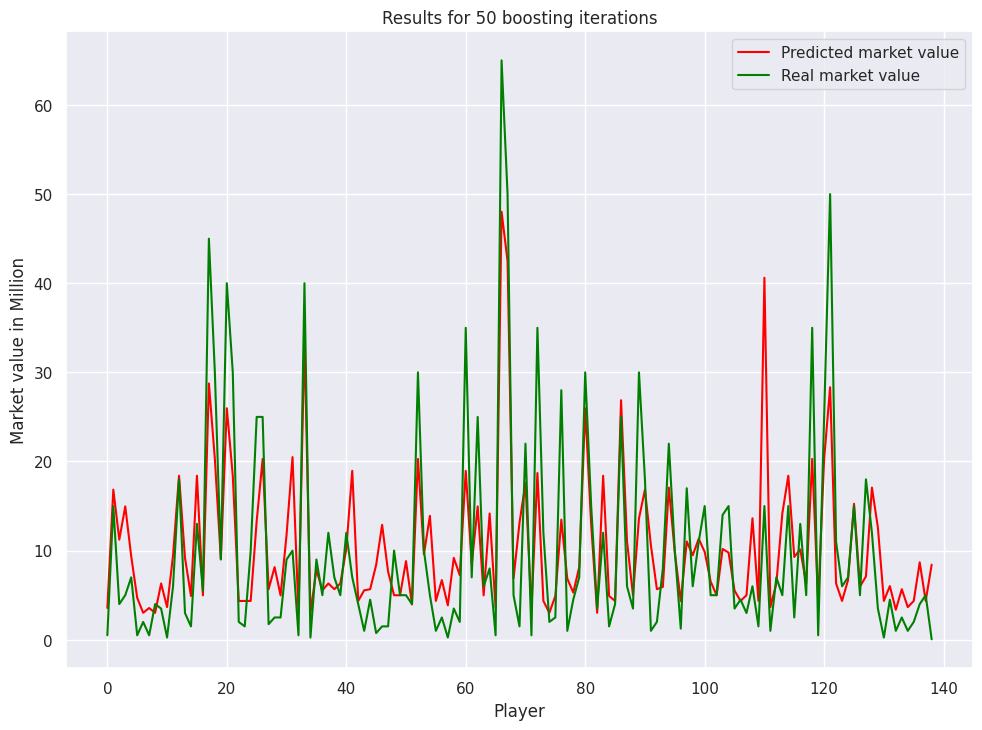

mean_squared_error :  40.76471762966248
mean_absolute_error :  4.3568513838940515
R2-SCORE = 0.711935391828779


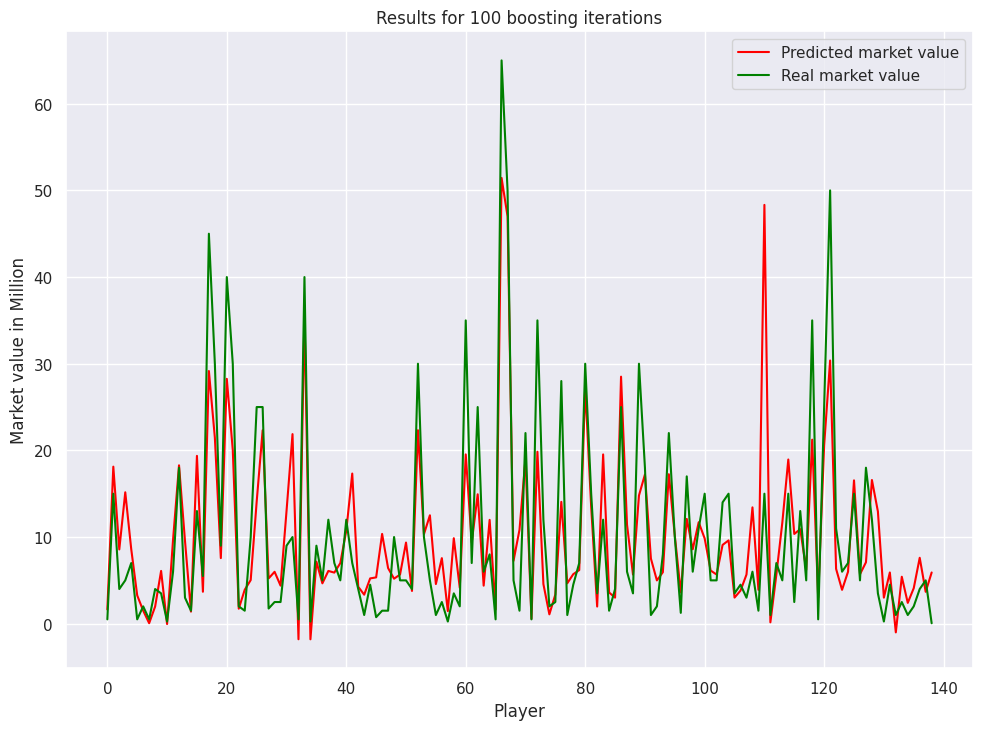

mean_squared_error :  39.12773486096624
mean_absolute_error :  4.208191631255781
R2-SCORE = 0.7235031599200852


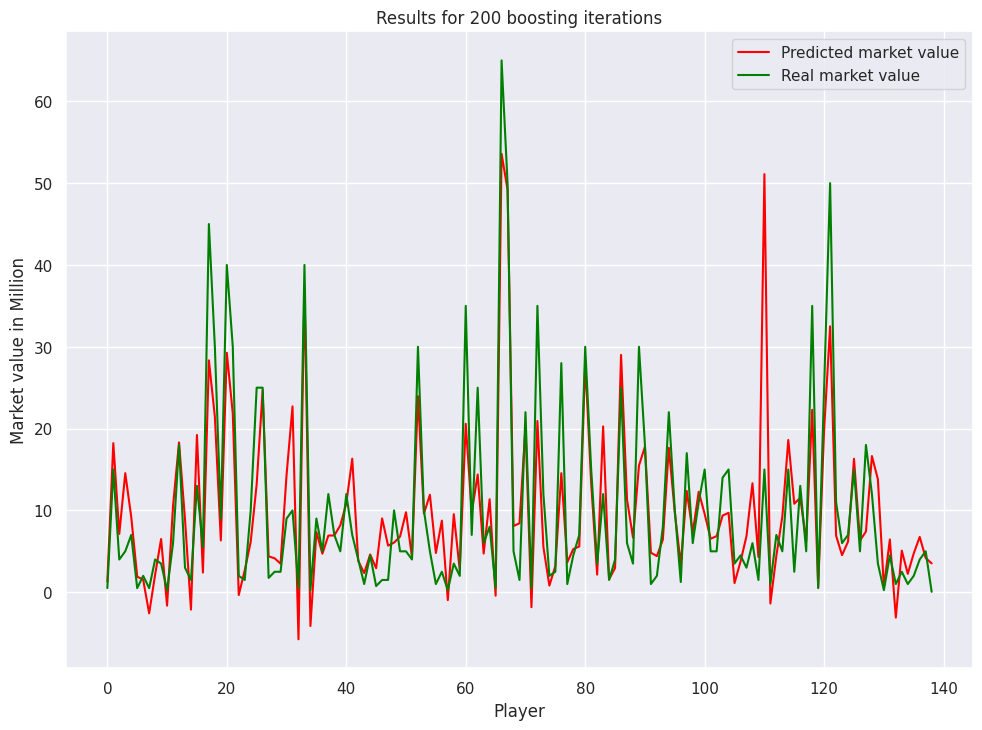

mean_squared_error :  38.648771881410084
mean_absolute_error :  4.17677872017546
R2-SCORE = 0.7268877604044505


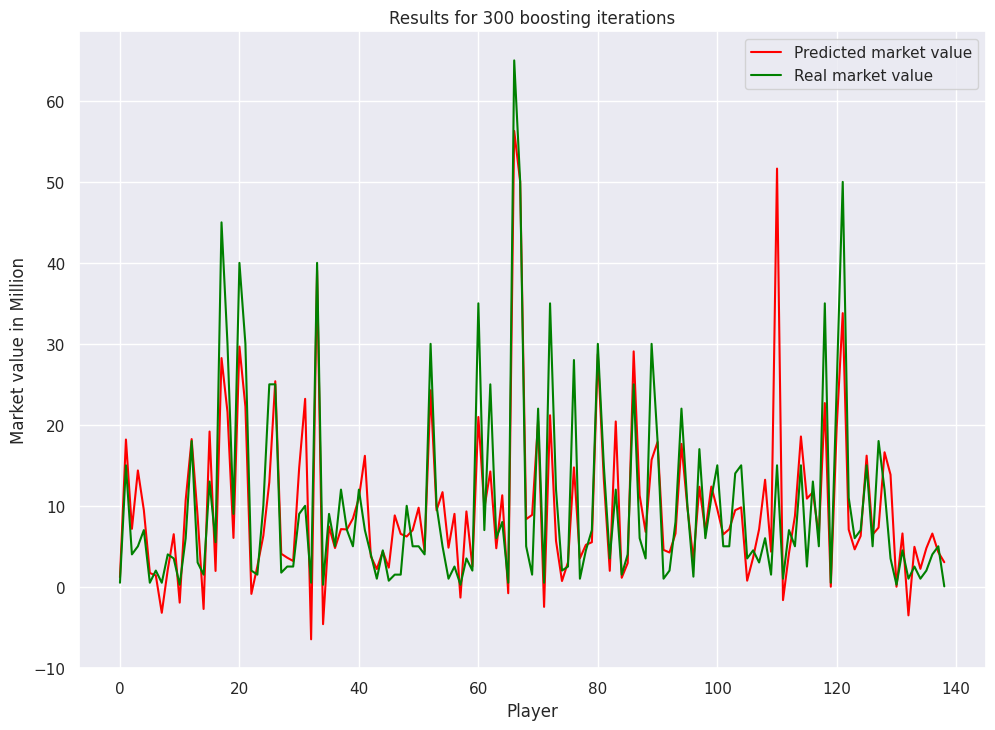

mean_squared_error :  38.404797587751084
mean_absolute_error :  4.170270866220929
R2-SCORE = 0.7286118091258278


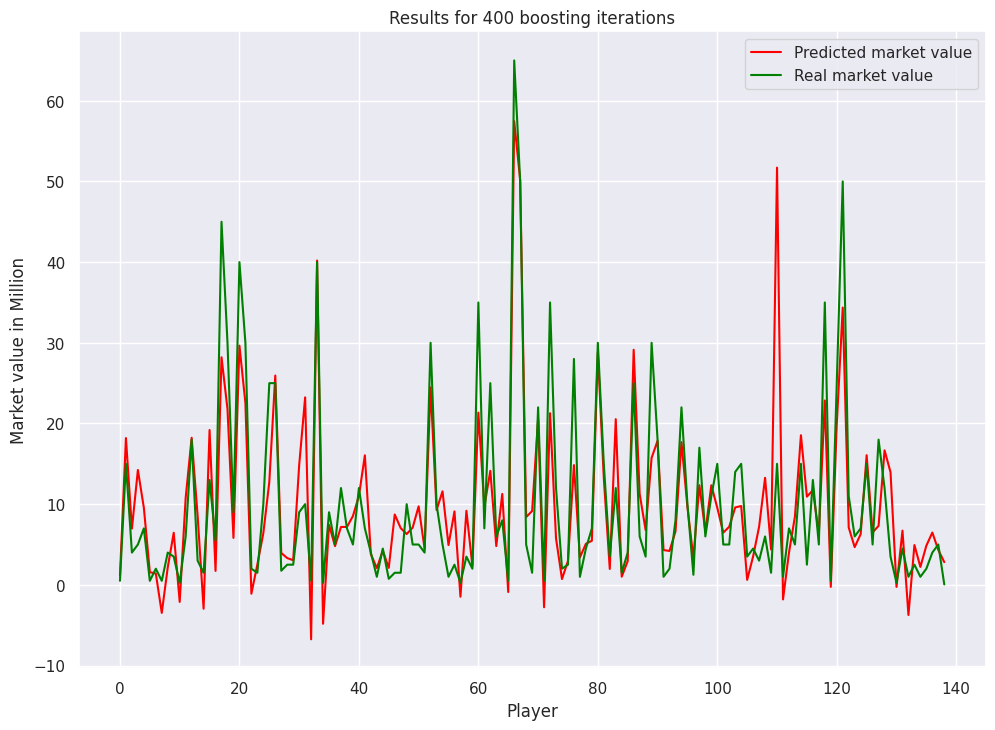

mean_squared_error :  38.33544053759285
mean_absolute_error :  4.174593774376498
R2-SCORE = 0.7291019219645638


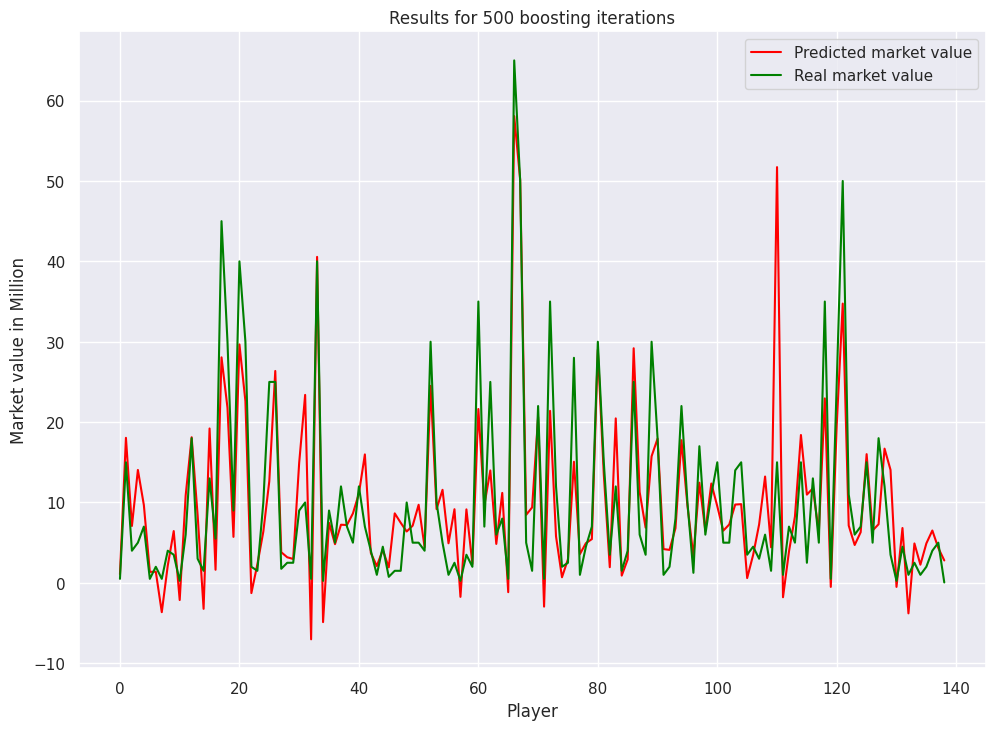

mean_squared_error :  38.1504888268252
mean_absolute_error :  4.165303607193753
R2-SCORE = 0.7304088865454765


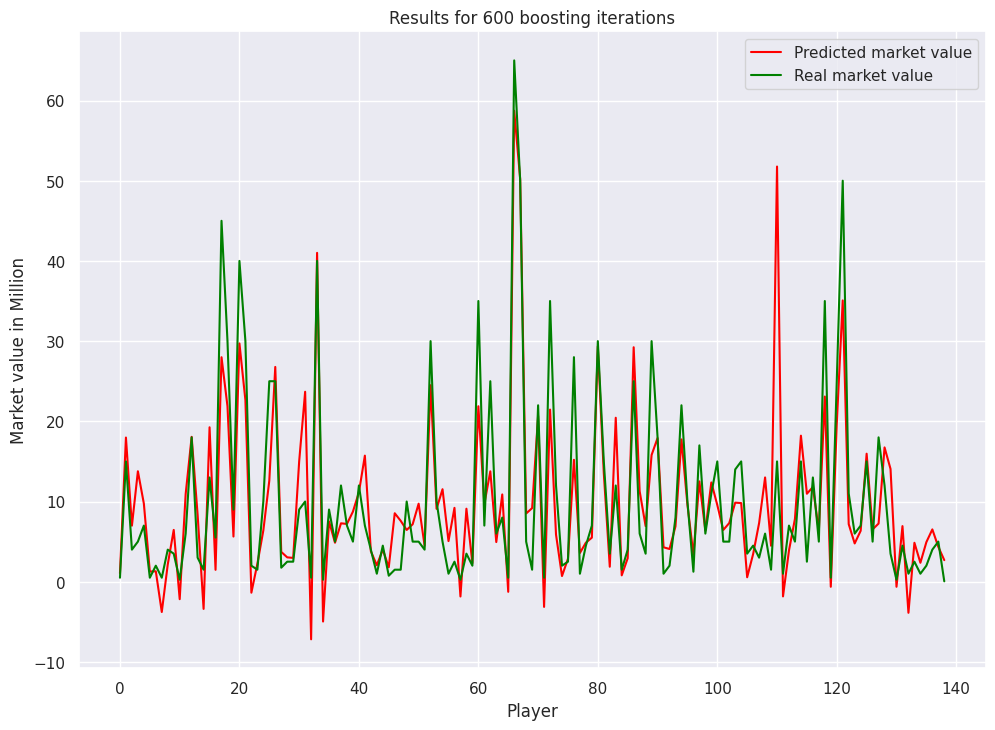

mean_squared_error :  38.1342174617949
mean_absolute_error :  4.162628256919149
R2-SCORE = 0.7305238684382607


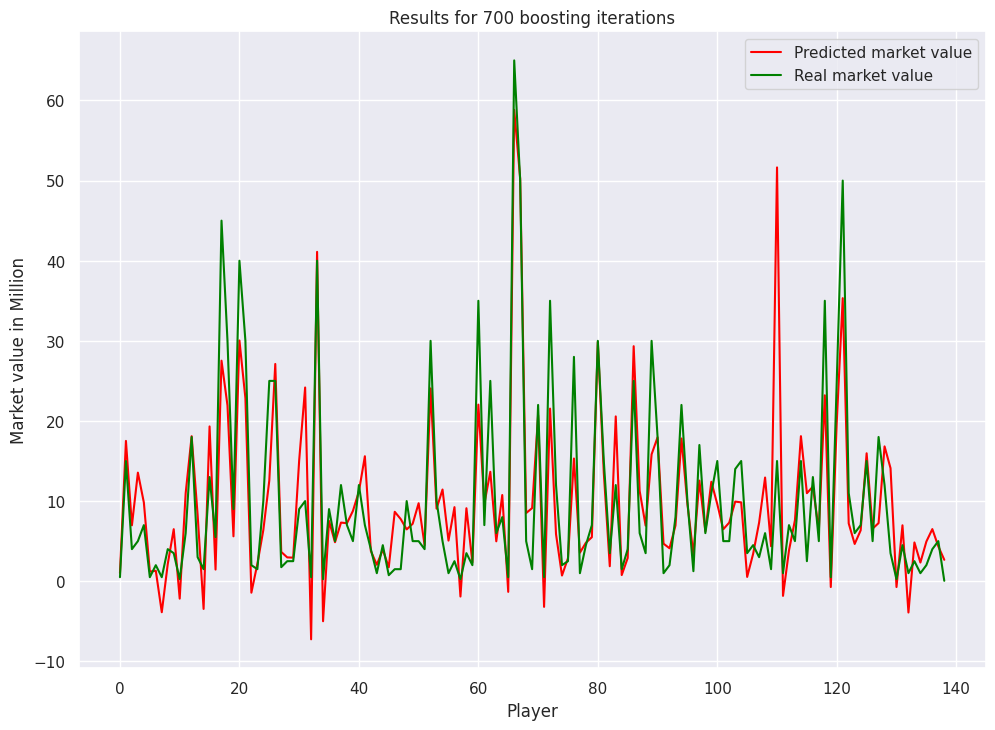

mean_squared_error :  38.072753698489755
mean_absolute_error :  4.158978259196866
R2-SCORE = 0.7309582032238975


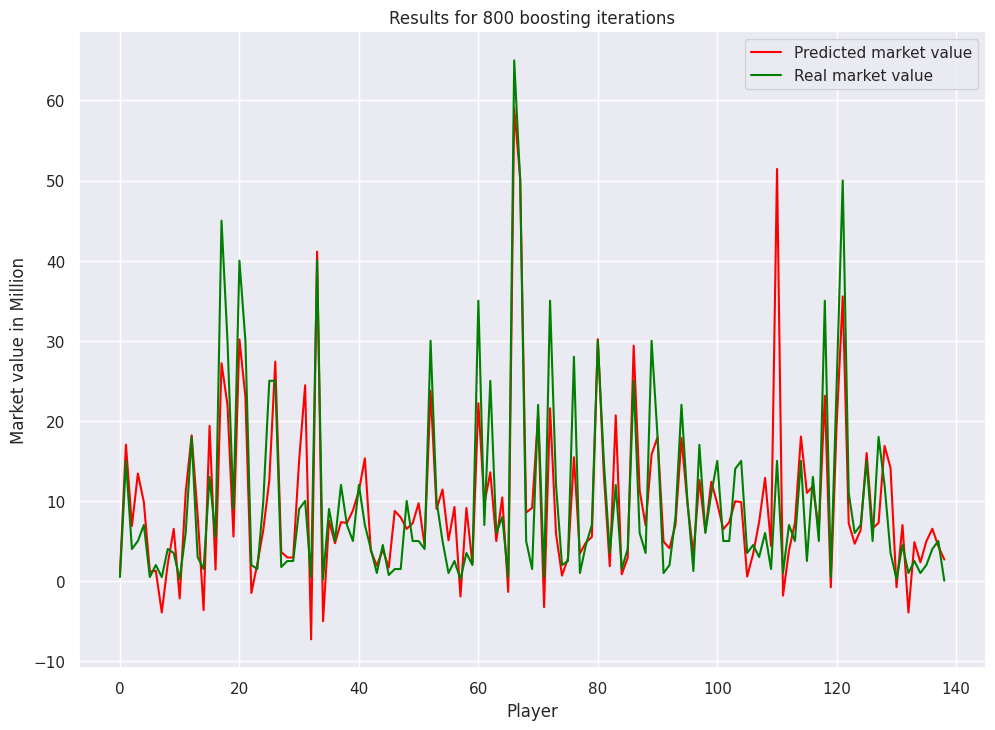

mean_squared_error :  37.89156425513693
mean_absolute_error :  4.154969561899359
R2-SCORE = 0.7322385816746539


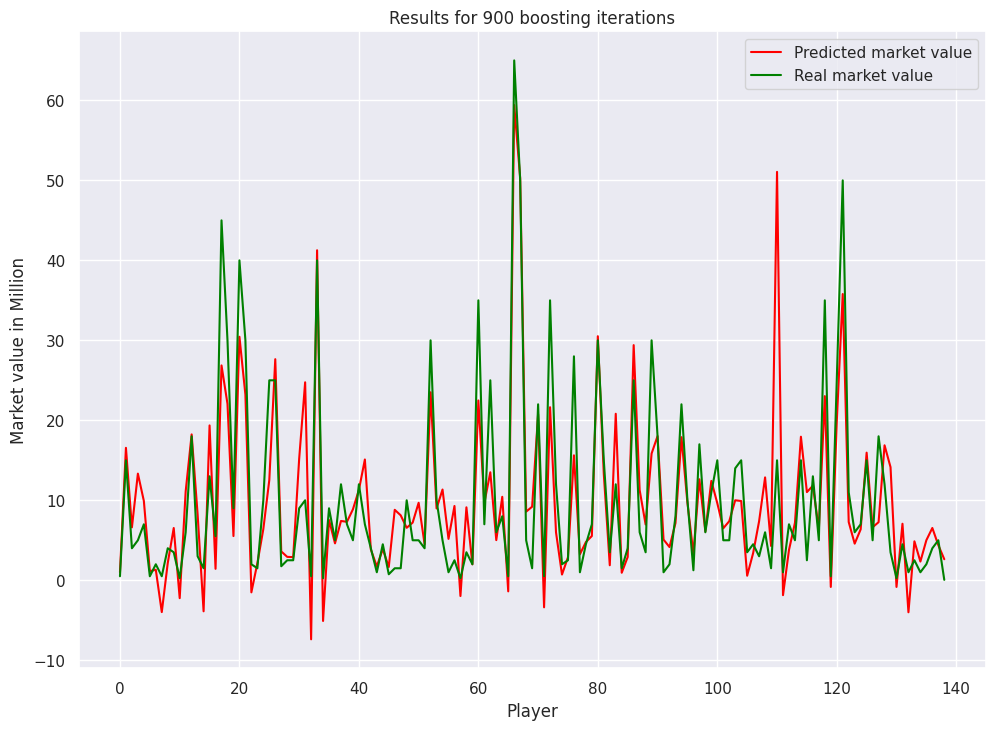

mean_squared_error :  37.97055509265702
mean_absolute_error :  4.159707790955572
R2-SCORE = 0.7316803915047609


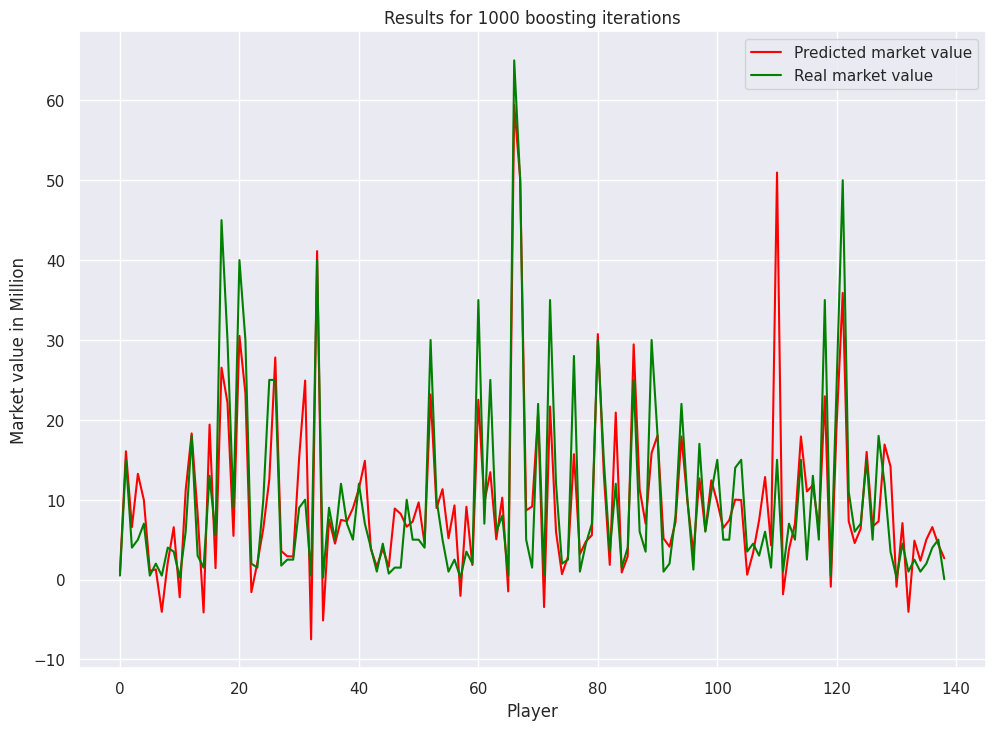

In [112]:
iters = [50,100,200,300,400,500,600,700,800,900,1000]
mse = []
for i in iters:

  m = ensemble_reg(x_l[2],y_l[2],i)

  mse.append(m)

Podemos compreender que a partir de 600 iterações começa a não modificar tanto o valor de R2, começando a convergir para o valor de 0.73. Embora o r2 não foi tão modificado o mean squared erro abaixou bastante visto que o obetivo desta combinação era reduzir este erro, já que ele foi utilizado como função de perda que deseja ser minimizada.

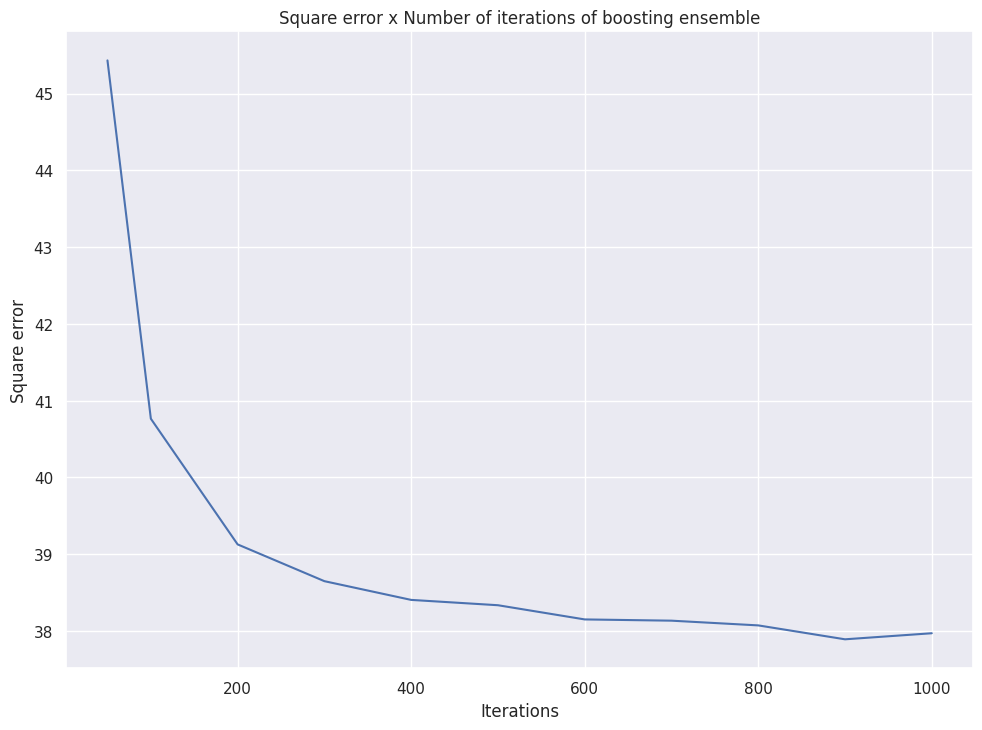

In [113]:
plt.plot(iters,mse)

plt.xlabel("Iterations")

plt.ylabel("Square error")

plt.title("Square error x Number of iterations of boosting ensemble")

plt.show()

Acima, podemos entender a ideia de dimiminuir a função de perda com base em alguma métrica, sendo muito interessante verificar isto.

# Adicional

Nesta etapa vamos verificar os jogadores mais valiosos e verificar qual o valor de mercado deles nos dias atuais

In [114]:
top9 = df_old.sort_values(['market_value'],ascending=False).loc[:1,['name','age','club','market_value']]

In [115]:
top9

name  age               club  market_value
92       Eden Hazard   26            Chelsea          75.0
263       Paul Pogba   24  Manchester+United          75.0
0     Alexis Sanchez   28            Arsenal          65.0
240  Kevin De Bruyne   26    Manchester+City          65.0
241    Sergio Aguero   29    Manchester+City          65.0
377       Harry Kane   23          Tottenham          60.0
93       Diego Costa   28            Chelsea          50.0
104   N%27Golo Kante   26            Chelsea          50.0
1         Mesut Ozil   28            Arsenal          50.0

In [116]:
top9 = top9.values

Este conjunto de dados é de 2017, então desta maneira, provavelmente os jogadores acima de 28 anos tem muita chance de ter se aposentado ou ter perdido muito valor de mercado. Assim, iremos analisar a trajetória desses jogadores de 2017 até 2023.

Todas as informações atuais foram retiradas deste site: https://www.transfermarkt.us/

In [117]:
#         17    18  19  20  21 22  23
hazard = [75.0,100,150,100,60,18,7.5]
pogba = [75,80,100,65.0,55,35,20]
sanchez = [65.0,70,25,10,5,3.5,4.5]
kdb = [65.0,150,150,120,90,85,80]
aguero = [65,75,65,42,15,0,0]
kane = [60.0,150,150,120,100,90,90]
costa = [50,60,25,14.5,5.0,3.5,3.5]
kante = [50,60,100,70,50,30,20]
ozil = [50,45,25,12,3.8,1.0,0.7]

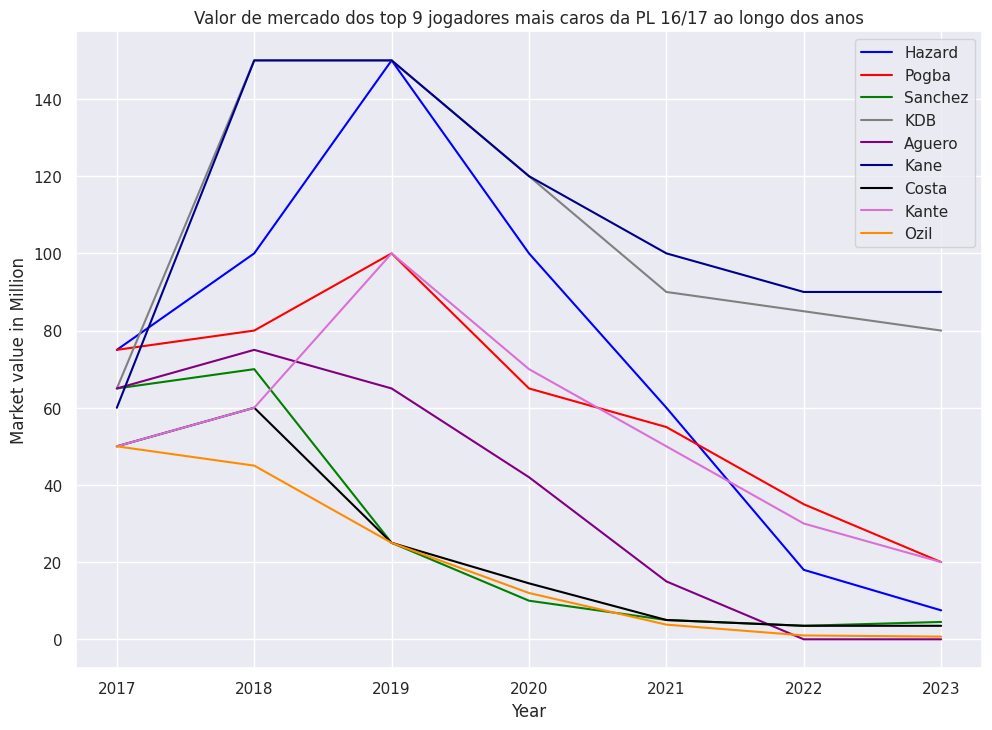

In [118]:
years = [2017,2018,2019,2020,2021,2022,2023]
plt.plot(years,hazard,color='blue',label='Hazard')
plt.plot(years,pogba,color='red',label='Pogba')
plt.plot(years,sanchez,color='green',label='Sanchez')
plt.plot(years,kdb,color='gray',label='KDB')
plt.plot(years,aguero,color='purple',label='Aguero')
plt.plot(years,kane,color='darkblue',label='Kane')
plt.plot(years,costa,color='black',label='Costa')
plt.plot(years,kante,color='orchid',label='Kante')
plt.plot(years,ozil,color='darkorange',label='Ozil')


plt.title("Valor de mercado dos top 9 jogadores mais caros da PL 16/17 ao longo dos anos")
plt.legend()

plt.ylabel("Market value in Million")
plt.xlabel("Year")


plt.show()

# Conclusão

Este projeto apresenta inicialmente um análise dos atributos visando identificar as características deles e entender como estão dispostos no conjunto de dados, para conseguir torná-los aceitáveis para serem utilizados em modelos estatísticos. Para se realizar esta tarefa, foi realizado cálculos de correlação, vistoria de valores nulos, análise de distribuição estatísitcias em outros métodos.

Após isso, inicou-se a fase de verificar a relação dos atributos com a variável alvo, para entender se alguma variável era muito explicativa, podendo ser utilizada como única. Infelizmente isso não foi possível, já que individualmente as variavéis não agregavam muitas informações para prever o preço de um jogador.

Em seguida, foi realizada uma rápida normalização utilizando MinMaxScaler, para deixar todos os atributos padronizados para evitar qualquer problema em relação a desbalanceamento nos valores dos atributos.

Em seguida iniciou-se a primeira regressão linear, em que se foi testada algumas hipóteses em relação ao conjunto de dados, e como as mudanças iriam afetar no resultado da regressão. COnsequentemente, os resultados foram analisados, focando no valor do R2-SCORE e como poderiámos interpretá-lo.

EM seguida, houve a tentativa de se combinar modelos de regressão para melhorar a qualidade da predição. 

Desta maneira, entende-se que mesmo que a combinação seja uma ferramenta muito poderosa para alavancar modelos, em relação ao R2 não houve tanta mudança, mas o erro quadrático, que era o objetivo à ser minimizado na combinação melhorou em relação a primeira regressão realizada. LOgo foi possível compreender um pouco como os jogadores da primeira divisão da inglaterra estavam dispostos.

FInalmente, foi realizado um adicional no trabalho, analisando os valores de mercado dos jogadores ao longos dos anos. Isto foi realizado apenas para o top-10 jogadores da liga. COm isto foi interessante verificar quais jogadores se mantiveram no topo e quais acabaram perdendo muito valor.

